# Perform Aggregations and Reshape Supplementary Datasets: <br>Previous Home Credit Application and Credit Bureau Data 

In [1]:
import matplotlib as mpl
import pandas as pd
import phik
import seaborn as sns
from utils.feature_tools import (
    boruta_feature_selection,
    correlation_threshold,
    drop_least_target_correlated_features,
    summary_stat_df,
)
from utils.plot import plot_correlation_matrix
from utils.utils import reduce_mem_usage

In [2]:
sns.set_theme(context="notebook", style="white", palette="muted")
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False

In [3]:
pd.set_option("display.float_format", lambda x: f"{x:.5f}")

## Previous Home Credit Application Data <a class="anchor" id="section2"></a>

In [4]:
old_apps_df = reduce_mem_usage(
    pd.read_csv("../data/original_data/previous_application.csv")
)
print("Number of instances:", old_apps_df.shape[0])
print("Number of features:", old_apps_df.shape[1])
old_apps_df = summary_stat_df(
    old_apps_df.drop("SK_ID_PREV", axis=1), "SK_ID_CURR", "n_prev_apps"
)
old_apps_df

Memory usage before optimization: 471.48 MB


Optimizing columns: 100%|██████████| 37/37 [00:00<00:00, 81.84it/s] 


Memory usage after optimization: 309.01 MB
Decreased by 34.5%
Number of instances: 1670214
Number of features: 37


SK_ID_CURR  n_prev_apps  AMT_ANNUITY_min  AMT_ANNUITY_max  \
0           100001            1       3951.00000       3951.00000   
1           100002            1       9251.77539       9251.77539   
2           100003            3       6737.31006      98356.99219   
3           100004            1       5357.25000       5357.25000   
4           100005            2       4813.20020       4813.20020   
...            ...          ...              ...              ...   
338852      456251            1       6605.91016       6605.91016   
338853      456252            1      10074.46484      10074.46484   
338854      456253            2       3973.09497       5567.71484   
338855      456254            2       2296.43994      19065.82422   
338856      456255            8       2250.00000      54022.14062   

        AMT_ANNUITY_mean  AMT_ANNUITY_median  AMT_ANNUITY_std  \
0             3951.00000          3951.00000          0.00000   
1             9251.77539          9251.77539          0.00000   
2            56553.98828         64567.66406      46332.55640   
3             5357.25000          5357.25000          0.00000   
4             4813.20020          4813.20020          0.00000   
...                  ...                 ...              ...   
338852        6605.91016          6605.91016          0.00000   
338853       10074.46484         10074.46484          0.00000   
338854        4770.40479          4770.40491       1127.56653   
338855       10681.13184         10681.13208      11857.74534   
338856       20775.39062         13957.58203      16481.87021   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  ...  \
0               24835.50000          24835.50000           24835.50000  ...   
1              179055.00000         179055.00000          179055.00000  ...   
2               68809.50000         900000.00000          435436.50000  ...   
3               24282.00000          24282.00000           24282.00000  ...   
4                   0.00000          44617.50000           22308.75000  ...   
...                     ...                  ...                   ...  ...   
338852          40455.00000          40455.00000           40455.00000  ...   
338853          57595.50000          57595.50000           57595.50000  ...   
338854          19413.00000          28912.50000           24162.75000  ...   
338855          18846.00000         223789.50000          121317.75000  ...   
338856          45000.00000        1170000.00000          362770.87500  ...   

        PRODUCT_COMBINATION_Cash X-Sell: low_cts  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
...                                          ...   
338852                                         0   
338853                                         0   
338854                                         0   
338855                                         0   
338856                                         1   

        PRODUCT_COMBINATION_Cash X-Sell: middle_cts  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
338852                                            0   
338853                                            0   
338854                                            0   
338855                                            0   
338856                                            2   

        PRODUCT_COMBINATION_POS household with interest_cts  \
0                                                       0     
1                                    

## Previous Home Credit Payment Data 

In [5]:
past_payment_df = reduce_mem_usage(
    pd.read_csv("../data/original_data/installments_payments.csv")
)
print("Number of instances:", past_payment_df.shape[0])
print("Number of features:", past_payment_df.shape[1])
past_payment_df = summary_stat_df(
    past_payment_df.drop("SK_ID_PREV", axis=1), "SK_ID_CURR", "n_prev_payments"
)
past_payment_df

Memory usage before optimization: 830.41 MB


Optimizing columns: 100%|██████████| 8/8 [00:01<00:00,  5.89it/s]


Memory usage after optimization: 311.40 MB
Decreased by 62.5%
Number of instances: 13605401
Number of features: 8


SK_ID_CURR  n_prev_payments  AMT_INSTALMENT_min  AMT_INSTALMENT_max  \
0           100001                7          3951.00000         17397.90039   
1           100002               19          9251.77539         53093.74609   
2           100003               25          6662.97021        560835.37500   
3           100004                3          5357.25000         10573.96484   
4           100005                9          4813.20020         17656.24414   
...            ...              ...                 ...                 ...   
339582      456251                7          6605.91016         12815.00977   
339583      456252                6         10046.87988         10074.46484   
339584      456253               14          2754.44995          5575.18506   
339585      456254               19          2296.43994         19065.82422   
339586      456255               74         11090.83496        615229.50000   

        AMT_INSTALMENT_mean  AMT_INSTALMENT_median  AMT_INSTALMENT_std  \
0                5885.13232             3980.92505          5076.67676   
1               11559.24707             9251.77539         10058.03788   
2               64754.58594            64275.61328        110542.59487   
3                7096.15479             5357.25000          3011.87172   
4                6240.20508             4813.20020          4281.01465   
...                     ...                    ...                 ...   
339582           7492.92432             6605.91016          2346.81906   
339583          10069.86719            10074.46484            11.26151   
339584           4399.70801             3973.09497          1145.44659   
339585          10239.83203             2296.43994          8602.51262   
339586          41464.71094            27489.68945         83407.92502   

        AMT_PAYMENT_min  AMT_PAYMENT_max  AMT_PAYMENT_mean  ...  \
0            3951.00000      17397.90039        5885.13232  ...   
1            9251.77539      53093.74609       11559.24707  ...   
2            6662.97021     560835.37500       64754.58594  ...   
3            5357.25000      10573.96484        7096.15479  ...   
4            4813.20020      17656.24414        6240.20508  ...   
...                 ...              ...               ...  ...   
339582       6605.91016      12815.00977        7492.92432  ...   
339583      10046.87988      10074.46484       10069.86719  ...   
339584         27.27000       5575.18506        4115.91504  ...   
339585       2296.43994      19065.82422       10239.83203  ...   
339586         34.96500     669251.62500       47646.21484  ...   

        NUM_INSTALMENT_NUMBER_min  NUM_INSTALMENT_NUMBER_max  \
0                               1                          4   
1                               1                         19   
2                               1                         12   
3                               1                          3   
4                               1                          9   
...                           ...                        ...   
339582                          1                          7   
339583                          1                          6   
339584                          1                         12   
339585                          1                         10   
339586                          1                         24   

        NUM_INSTALMENT_NUMBER_mean  NUM_INSTALMENT_NUMBER_median  \
0                          2.71429                       3.00000   
1                         10.00000                      10.00000   
2                          5.08000                       5.00000   
3                          2.00000                       2.00000   
4                          5.00000                       5.00000   
...                            ...                           ...   
339582                     4.00000                       4.00000   
339583                     3.50000                  

## Previous Cash Balances at Home Credit

In [6]:
old_cash_balance_df = reduce_mem_usage(
    pd.read_csv("../data/original_data/POS_CASH_balance.csv")
)
print("Number of instances:", old_cash_balance_df.shape[0])
print("Number of features:", old_cash_balance_df.shape[1])
old_cash_balance_df = summary_stat_df(
    old_cash_balance_df.drop("SK_ID_PREV", axis=1), "SK_ID_CURR", "n_old_cash_balances"
)
old_cash_balance_df

Memory usage before optimization: 610.43 MB


Optimizing columns: 100%|██████████| 8/8 [00:00<00:00, 10.07it/s]


Memory usage after optimization: 238.45 MB
Decreased by 60.9%
Number of instances: 10001358
Number of features: 8


SK_ID_CURR  n_old_cash_balances  CNT_INSTALMENT_min  \
0           100001                    9             4.00000   
1           100002                   19            24.00000   
2           100003                   28             6.00000   
3           100004                    4             3.00000   
4           100005                   11             9.00000   
...            ...                  ...                 ...   
337247      456251                    9             7.00000   
337248      456252                    7             6.00000   
337249      456253                   17             4.00000   
337250      456254                   20            14.00000   
337251      456255                   71             3.00000   

        CNT_INSTALMENT_max  CNT_INSTALMENT_mean  CNT_INSTALMENT_median  \
0                  4.00000              4.00000                4.00000   
1                 24.00000             24.00000               24.00000   
2                 12.00000             10.10714               12.00000   
3                  4.00000              3.75000                4.00000   
4                 12.00000             11.70000               12.00000   
...                    ...                  ...                    ...   
337247             8.00000              7.87500                8.00000   
337248             6.00000              6.00000                6.00000   
337249            12.00000              6.70588                6.00000   
337250            16.00000             14.90000               14.00000   
337251            36.00000             22.78873               24.00000   

        CNT_INSTALMENT_std  CNT_INSTALMENT_FUTURE_min  \
0                  0.00000                    0.00000   
1                  0.00000                    6.00000   
2                  2.80660                    0.00000   
3                  0.50000                    0.00000   
4                  0.94868                    0.00000   
...                    ...                        ...   
337247             0.35355                    0.00000   
337248             0.00000                    0.00000   
337249             3.15762                    0.00000   
337250             1.02084                    4.00000   
337251            11.25791                    0.00000   

        CNT_INSTALMENT_FUTURE_max  CNT_INSTALMENT_FUTURE_mean  ...  \
0                         4.00000                     1.44444  ...   
1                        24.00000                    15.00000  ...   
2                        12.00000                     5.78571  ...   
3                         4.00000                     2.25000  ...   
4                        12.00000                     7.20000  ...   
...                           ...                         ...  ...   
337247                    8.00000                     4.37500  ...   
337248                    6.00000                     3.00000  ...   
337249                    6.00000                     2.00000  ...   
337250                   16.00000                    10.35000  ...   
337251                   36.00000                    15.14085  ...   

        SK_DPD_DEF_std  NAME_CONTRACT_STATUS_Active_cts  \
0              2.33333                                7   
1              0.00000                               19   
2              0.00000                               26   
3              0.00000                                3   
4              0.00000                                9   
...                ...                              ...   
337247         0.00000                                7   
337248         0.00000                                6   
337249         1.21268                               15   
337250         0.00000                               20   
337251         0.59339                               65   

        NAME_CONTRACT_STATUS_Amortized debt_cts  \
0                                             0   
1                        

## Previous Credit Balances at Home Credit

In [7]:
old_credit_balance_df = reduce_mem_usage(
    pd.read_csv("../data/original_data/credit_card_balance.csv")
)
print("Number of instances:", old_credit_balance_df.shape[0])
print("Number of features:", old_credit_balance_df.shape[1])
old_credit_balance_df = summary_stat_df(
    old_credit_balance_df.drop("SK_ID_PREV", axis=1),
    "SK_ID_CURR",
    "n_old_credit_balances",
)
old_credit_balance_df

Memory usage before optimization: 673.88 MB


Optimizing columns: 100%|██████████| 23/23 [00:00<00:00, 25.57it/s]


Memory usage after optimization: 285.67 MB
Decreased by 57.6%
Number of instances: 3840312
Number of features: 23


SK_ID_CURR  n_old_credit_balances  AMT_BALANCE_min  AMT_BALANCE_max  \
0           100006                      6          0.00000          0.00000   
1           100011                     74          0.00000     189000.00000   
2           100013                     96          0.00000     161420.21875   
3           100021                     17          0.00000          0.00000   
4           100023                      8          0.00000          0.00000   
...            ...                    ...              ...              ...   
103553      456244                     41          0.00000     453627.68750   
103554      456246                      8          0.00000      43490.11328   
103555      456247                     95          0.00000     190202.12500   
103556      456248                     23          0.00000          0.00000   
103557      456250                     12     153832.71875     200208.92188   

        AMT_BALANCE_mean  AMT_BALANCE_median  AMT_BALANCE_std  \
0                0.00000             0.00000          0.00000   
1            54482.11328             0.00000      68127.23813   
2            18159.91992             0.00000      43237.40647   
3                0.00000             0.00000          0.00000   
4                0.00000             0.00000          0.00000   
...                  ...                 ...              ...   
103553      131834.73438             0.00000     181540.70914   
103554       13136.73145           753.41251      18263.38086   
103555       23216.39453             0.00000      56576.24220   
103556           0.00000             0.00000          0.00000   
103557      173589.32812        173189.45312      12914.00907   

        AMT_CREDIT_LIMIT_ACTUAL_min  AMT_CREDIT_LIMIT_ACTUAL_max  \
0                            270000                       270000   
1                             90000                       180000   
2                             45000                       157500   
3                            675000                       675000   
4                             45000                       225000   
...                             ...                          ...   
103553                            0                       450000   
103554                       135000                       135000   
103555                            0                       180000   
103556                       900000                       900000   
103557                       175500                       180000   

        AMT_CREDIT_LIMIT_ACTUAL_mean  ...  SK_DPD_DEF_mean  SK_DPD_DEF_median  \
0                       270000.00000  ...          0.00000            0.00000   
1                       164189.18919  ...          0.00000            0.00000   
2                       131718.75000  ...          0.01042            0.00000   
3                       675000.00000  ...          0.00000            0.00000   
4                       135000.00000  ...          0.00000            0.00000   
...                              ...  ...              ...                ...   
103553                  296341.46341  ...          0.00000            0.00000   
103554                  135000.00000  ...          0.00000            0.00000   
103555                  144000.00000  ...          0.02105            0.00000   
103556                  900000.00000  ...          0.00000            0.00000   
103557                  178875.00000  ...          0.00000            0.00000   

        SK_DPD_DEF_std  NAME_CONTRACT_STATUS_Active_cts  \
0              0.00000                                6   
1              0.00000                               74   
2              0.10206                               96   
3              0.00000                                7   
4              0.00000                                8   
...                ...                              ...   
103553         0.00000                               36   
103554         0

## Credit Bureau Data

### Balances

In [8]:
bureau_balance_df = reduce_mem_usage(
    pd.read_csv("../data/original_data/bureau_balance.csv")
)
print("Number of instances:", bureau_balance_df.shape[0])
print("Number of features:", bureau_balance_df.shape[1])
bureau_balance_df = summary_stat_df(
    bureau_balance_df, "SK_ID_BUREAU", "n_monthly_cb_balances"
)
bureau_balance_df

Memory usage before optimization: 624.85 MB


Optimizing columns: 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


Memory usage after optimization: 338.46 MB
Decreased by 45.8%
Number of instances: 27299925
Number of features: 3


SK_ID_BUREAU  n_monthly_cb_balances  MONTHS_BALANCE_min  \
0            5001709                     97                 -96   
1            5001710                     83                 -82   
2            5001711                      4                  -3   
3            5001712                     19                 -18   
4            5001713                     22                 -21   
...              ...                    ...                 ...   
817390       6842884                     48                 -47   
817391       6842885                     24                 -23   
817392       6842886                     33                 -32   
817393       6842887                     37                 -36   
817394       6842888                     62                 -61   

        MONTHS_BALANCE_max  MONTHS_BALANCE_mean  MONTHS_BALANCE_median  \
0                        0            -48.00000              -48.00000   
1                        0            -41.00000              -41.00000   
2                        0             -1.50000               -1.50000   
3                        0             -9.00000               -9.00000   
4                        0            -10.50000              -10.50000   
...                    ...                  ...                    ...   
817390                   0            -23.50000              -23.50000   
817391                   0            -11.50000              -11.50000   
817392                   0            -16.00000              -16.00000   
817393                   0            -18.00000              -18.00000   
817394                   0            -30.50000              -30.50000   

        MONTHS_BALANCE_std  STATUS_0_cts  STATUS_1_cts  STATUS_2_cts  \
0                 28.14546             0             0             0   
1                 24.10394             5             0             0   
2                  1.29099             3             0             0   
3                  5.62731            10             0             0   
4                  6.49359             0             0             0   
...                    ...           ...           ...           ...   
817390            14.00000             9             0             0   
817391             7.07107            12             0             0   
817392             9.66954             8             0             0   
817393            10.82436             6             0             0   
817394            18.04162             9             1             0   

        STATUS_3_cts  STATUS_4_cts  STATUS_5_cts  STATUS_C_cts  STATUS_X_cts  
0                  0             0             0            86            11  
1                  0             0             0            48            30  
2                  0             0             0             0             1  
3                  0             0             0             9             0  
4                  0             0             0             0            22  
...              ...           ...           ...           ...           ...  
817390             0             0             0            20            19  
817391             0             0            12             0             0  
817392             0             0             0            25             0  
817393             0             0             0            31             0  
817394             0             0             0            52             0  

[817395 rows x 15 columns]

### Credit Bureau Data

In [9]:
bureau_df = reduce_mem_usage(pd.read_csv("../data/original_data/bureau.csv"))
print("Number of instances:", bureau_df.shape[0])
print("Number of features:", bureau_df.shape[1])
bureau_df

Memory usage before optimization: 222.62 MB


Optimizing columns: 100%|██████████| 17/17 [00:00<00:00, 67.51it/s]


Memory usage after optimization: 112.95 MB
Decreased by 49.3%
Number of instances: 1716428
Number of features: 17


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0           -153.00000         -153.00000   
1                         0           1075.00000                NaN   
2                         0            528.00000                NaN   
3                         0                  NaN                NaN   
4                         0           1197.00000                NaN   
...                     ...                  ...                ...   
1716423                   0            -30.00000                NaN   
1716424                   0          -2432.00000        -2492.00000   
1716425                   0          -1628.00000         -970.00000   
1716426                   0          -1513.00000        -1513.00000   
1716427                   0                  NaN         -387.00000   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0     91323.00000   
1                           NaN                   0    225000.00000   
2                           NaN                   0    464323.50000   
3                           NaN                   0     90000.00000   
4                   77674.50000                   0   2700000.00000   
...                         ...                 ...             ...   
1716423                 0.00000                   0     11250.00000   
1716424              5476.50000                   0     38130.83984   
1716425                     NaN                   0     15570.00000   
1716426                     NaN                   0     36000.00000   
1716427                     NaN                   0     22500.00000   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                    0.00000                   NaN                 0.00000   
1               171342.00000                   NaN                 0.00000   
2                        NaN                   NaN                 0.00000   
3                        NaN                   NaN                 0.00000   
4                        NaN                   NaN                 0.00000   
...                      ...                   ...                     ...   
1716423          11250.00000               0.00000                 0.00000   
1716424              0.00000               0.00000                 0.00000   
1716425                  NaN                   NaN                 0.00000   
1716426              0.00000               0.00000                 0.00000   
1716427              0.00000                   NaN                 0.00000   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

## Complete Credit Bureau Data

In [10]:
bureau_df = pd.merge(bureau_df, bureau_balance_df, on="SK_ID_BUREAU", how="left")
bureau_df = summary_stat_df(
    bureau_df.drop("SK_ID_BUREAU", axis=1), "SK_ID_CURR", "n_cb_applications"
)
bureau_df

SK_ID_CURR  n_cb_applications  AMT_ANNUITY_min  AMT_ANNUITY_max  \
0           100001                  7          0.00000      10822.50000   
1           100002                  8          0.00000          0.00000   
2           100003                  4          0.00000          0.00000   
3           100004                  2          0.00000          0.00000   
4           100005                  3          0.00000       4261.50000   
...            ...                ...              ...              ...   
305806      456249                 13          0.00000          0.00000   
305807      456250                  3      27757.39453     384147.00000   
305808      456253                  4      58369.50000      58369.50000   
305809      456254                  1          0.00000          0.00000   
305810      456255                 11          0.00000       3244.50000   

        AMT_ANNUITY_mean  AMT_ANNUITY_median  AMT_ANNUITY_std  \
0             3545.35718             0.00000       4800.60753   
1                0.00000             0.00000          0.00000   
2                0.00000             0.00000          0.00000   
3                0.00000             0.00000          0.00000   
4             1420.50000             0.00000       2460.37817   
...                  ...                 ...              ...   
305806           0.00000             0.00000          0.00000   
305807      154567.96875         51799.50000     199184.35116   
305808       58369.50000         58369.50000          0.00000   
305809           0.00000             0.00000          0.00000   
305810        1081.50000             0.00000       1622.25000   

        AMT_CREDIT_MAX_OVERDUE_min  AMT_CREDIT_MAX_OVERDUE_max  \
0                          0.00000                     0.00000   
1                          0.00000                  5043.64502   
2                          0.00000                     0.00000   
3                          0.00000                     0.00000   
4                          0.00000                     0.00000   
...                            ...                         ...   
305806                     0.00000                 18945.00000   
305807                     0.00000                     0.00000   
305808                     0.00000                     0.00000   
305809                     0.00000                     0.00000   
305810                     0.00000                 25578.00000   

        AMT_CREDIT_MAX_OVERDUE_mean  ...  CREDIT_TYPE_Interbank credit_cts  \
0                           0.00000  ...                                 0   
1                        1681.02893  ...                                 0   
2                           0.00000  ...                                 0   
3                           0.00000  ...                                 0   
4                           0.00000  ...                                 0   
...                             ...  ...                               ...   
305806                   6147.00000  ...                                 0   
305807                      0.00000  ...                                 0   
305808                      0.00000  ...                                 0   
305809                      0.00000  ...                                 0   
305810                  12056.48145  ...                                 0   

        CREDIT_TYPE_Loan for business development_cts  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
305806                                              0   
305807                                              0   
305808                                              0   
305809                    

# Perform Feature Selection on Supplementary Datasets

__import training data__

In [11]:
%store -r X_train
X_train = X_train.copy()
%store -r y_train
y_train = y_train.copy()

__Previous Home Credit Applications__

In [12]:
old_apps_feat_sel = pd.merge(
    X_train["SK_ID_CURR"], old_apps_df, on="SK_ID_CURR", how="left"
)
old_apps_feat_sel = old_apps_feat_sel.fillna(0)
old_apps_feat_sel

SK_ID_CURR  n_prev_apps  AMT_ANNUITY_min  AMT_ANNUITY_max  \
0           303785      4.00000       3232.30493      17311.81445   
1           337526      8.00000       6750.00000      35786.60938   
2           164863      1.00000       6096.87012       6096.87012   
3           374999     23.00000       6032.16016      68034.19531   
4           183756      2.00000       4865.49023      59074.33594   
...            ...          ...              ...              ...   
196801      116887      2.00000       5699.92480       6857.81982   
196802      412145      4.00000       7036.33496      11889.31543   
196803      364978      0.00000          0.00000          0.00000   
196804      397255      1.00000       6773.85010       6773.85010   
196805      453297      6.00000       7211.43018      25932.91406   

        AMT_ANNUITY_mean  AMT_ANNUITY_median  AMT_ANNUITY_std  \
0            10261.94531         10251.83215       8117.14704   
1            16588.20117         15215.49023       9095.73367   
2             6096.87012          6096.87012          0.00000   
3            33062.33203         33750.00000      16949.29473   
4            31969.91406         31969.91309      38331.44240   
...                  ...                 ...              ...   
196801        6278.87207          6278.87231        818.75542   
196802        9462.82520          9462.82520       3431.57540   
196803           0.00000             0.00000          0.00000   
196804        6773.85010          6773.85010          0.00000   
196805       13674.60645          9513.24756       7753.18518   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  ...  \
0               77602.50000         292500.00000          149051.25000  ...   
1                   0.00000         882000.00000          217107.00000  ...   
2               60975.00000          60975.00000           60975.00000  ...   
3                   0.00000        1467000.00000          386121.53125  ...   
4               44991.00000        1129500.00000          587245.50000  ...   
...                     ...                  ...                   ...  ...   
196801          70713.00000         107725.50000           89219.25000  ...   
196802              0.00000         121410.00000           39609.00000  ...   
196803              0.00000              0.00000               0.00000  ...   
196804          74164.50000          74164.50000           74164.50000  ...   
196805              0.00000         450000.00000          196896.00000  ...   

        PRODUCT_COMBINATION_Cash X-Sell: low_cts  \
0                                        1.00000   
1                                        0.00000   
2                                        0.00000   
3                                        2.00000   
4                                        0.00000   
...                                          ...   
196801                                   0.00000   
196802                                   0.00000   
196803                                   0.00000   
196804                                   0.00000   
196805                                   0.00000   

        PRODUCT_COMBINATION_Cash X-Sell: middle_cts  \
0                                           0.00000   
1                                           2.00000   
2                                           0.00000   
3                                           4.00000   
4                                           1.00000   
...                                             ...   
196801                                      0.00000   
196802                                      0.00000   
196803                                      0.00000   
196804                                      0.00000   
196805                                      0.00000   

        PRODUCT_COMBINATION_POS household with interest_cts  \
0                                                 0.00000     
1                                    

In [13]:
old_apps_boruta, _ = boruta_feature_selection(old_apps_feat_sel, y_train.values.ravel())
old_apps_boruta

Iteration: 	1 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	2 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	3 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	4 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	5 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	6 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	7 / 40
Confirmed: 	0
Tentative: 	240
Rejected: 	0
Iteration: 	8 / 40
Confirmed: 	106
Tentative: 	26
Rejected: 	108
Iteration: 	9 / 40
Confirmed: 	106
Tentative: 	26
Rejected: 	108
Iteration: 	10 / 40
Confirmed: 	106
Tentative: 	26
Rejected: 	108
Iteration: 	11 / 40
Confirmed: 	106
Tentative: 	26
Rejected: 	108
Iteration: 	12 / 40
Confirmed: 	107
Tentative: 	25
Rejected: 	108
Iteration: 	13 / 40
Confirmed: 	107
Tentative: 	19
Rejected: 	114
Iteration: 	14 / 40
Confirmed: 	107
Tentative: 	19
Rejected: 	114
Iteration: 	15 / 40
Confirmed: 	107
Tentative: 	19
Rejected: 	114
Iteration: 	16 / 40
Confirmed: 	107
Tent

n_prev_apps  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0           4.00000       3232.30493      17311.81445       10261.94531   
1           8.00000       6750.00000      35786.60938       16588.20117   
2           1.00000       6096.87012       6096.87012        6096.87012   
3          23.00000       6032.16016      68034.19531       33062.33203   
4           2.00000       4865.49023      59074.33594       31969.91406   
...             ...              ...              ...               ...   
196801      2.00000       5699.92480       6857.81982        6278.87207   
196802      4.00000       7036.33496      11889.31543        9462.82520   
196803      0.00000          0.00000          0.00000           0.00000   
196804      1.00000       6773.85010       6773.85010        6773.85010   
196805      6.00000       7211.43018      25932.91406       13674.60645   

        AMT_ANNUITY_median  AMT_ANNUITY_std  AMT_APPLICATION_min  \
0              10251.83215       8117.14704          77602.50000   
1              15215.49023       9095.73367              0.00000   
2               6096.87012          0.00000          60975.00000   
3              33750.00000      16949.29473              0.00000   
4              31969.91309      38331.44240          44991.00000   
...                    ...              ...                  ...   
196801          6278.87231        818.75542          70713.00000   
196802          9462.82520       3431.57540              0.00000   
196803             0.00000          0.00000              0.00000   
196804          6773.85010          0.00000          74164.50000   
196805          9513.24756       7753.18518              0.00000   

        AMT_APPLICATION_max  AMT_APPLICATION_mean  AMT_APPLICATION_median  \
0              292500.00000          149051.25000            113051.25000   
1              882000.00000          217107.00000            121315.50000   
2               60975.00000           60975.00000             60975.00000   
3             1467000.00000          386121.53125            337500.00000   
4             1129500.00000          587245.50000            587245.50000   
...                     ...                   ...                     ...   
196801         107725.50000           89219.25000             89219.25000   
196802         121410.00000           39609.00000             18513.00000   
196803              0.00000               0.00000                 0.00000   
196804          74164.50000           74164.50000             74164.50000   
196805         450000.00000          196896.00000            154154.25000   

        ...  NAME_YIELD_GROUP_low_action_cts  NAME_YIELD_GROUP_low_normal_cts  \
0       ...                          2.00000                          1.00000   
1       ...                          1.00000                          0.00000   
2       ...                          0.00000                          1.00000   
3       ...                          0.00000                          4.00000   
4       ...                          0.00000                          0.00000   
...     ...                              ...                              ...   
196801  ...                          1.00000                          1.00000   
196802  ...                          0.00000                          1.00000   
196803  ...                          0.00000                          0.00000   
196804  ...                          0.00000                          0.00000   
196805  ...                          1.00000                          0.00000   

        PRODUCT_COMBINATION_Card Street_cts  \
0                                   0.00000   
1                                   1.00000   
2                                   0.00000   
3                                   1.00000   
4                                   0.00000   
...                                     ...   
196801                              0.00000   
196802          

In [14]:
old_apps_boruta.to_pickle("../data/aggregated_supplementary_data/old_apps_boruta.pkl")

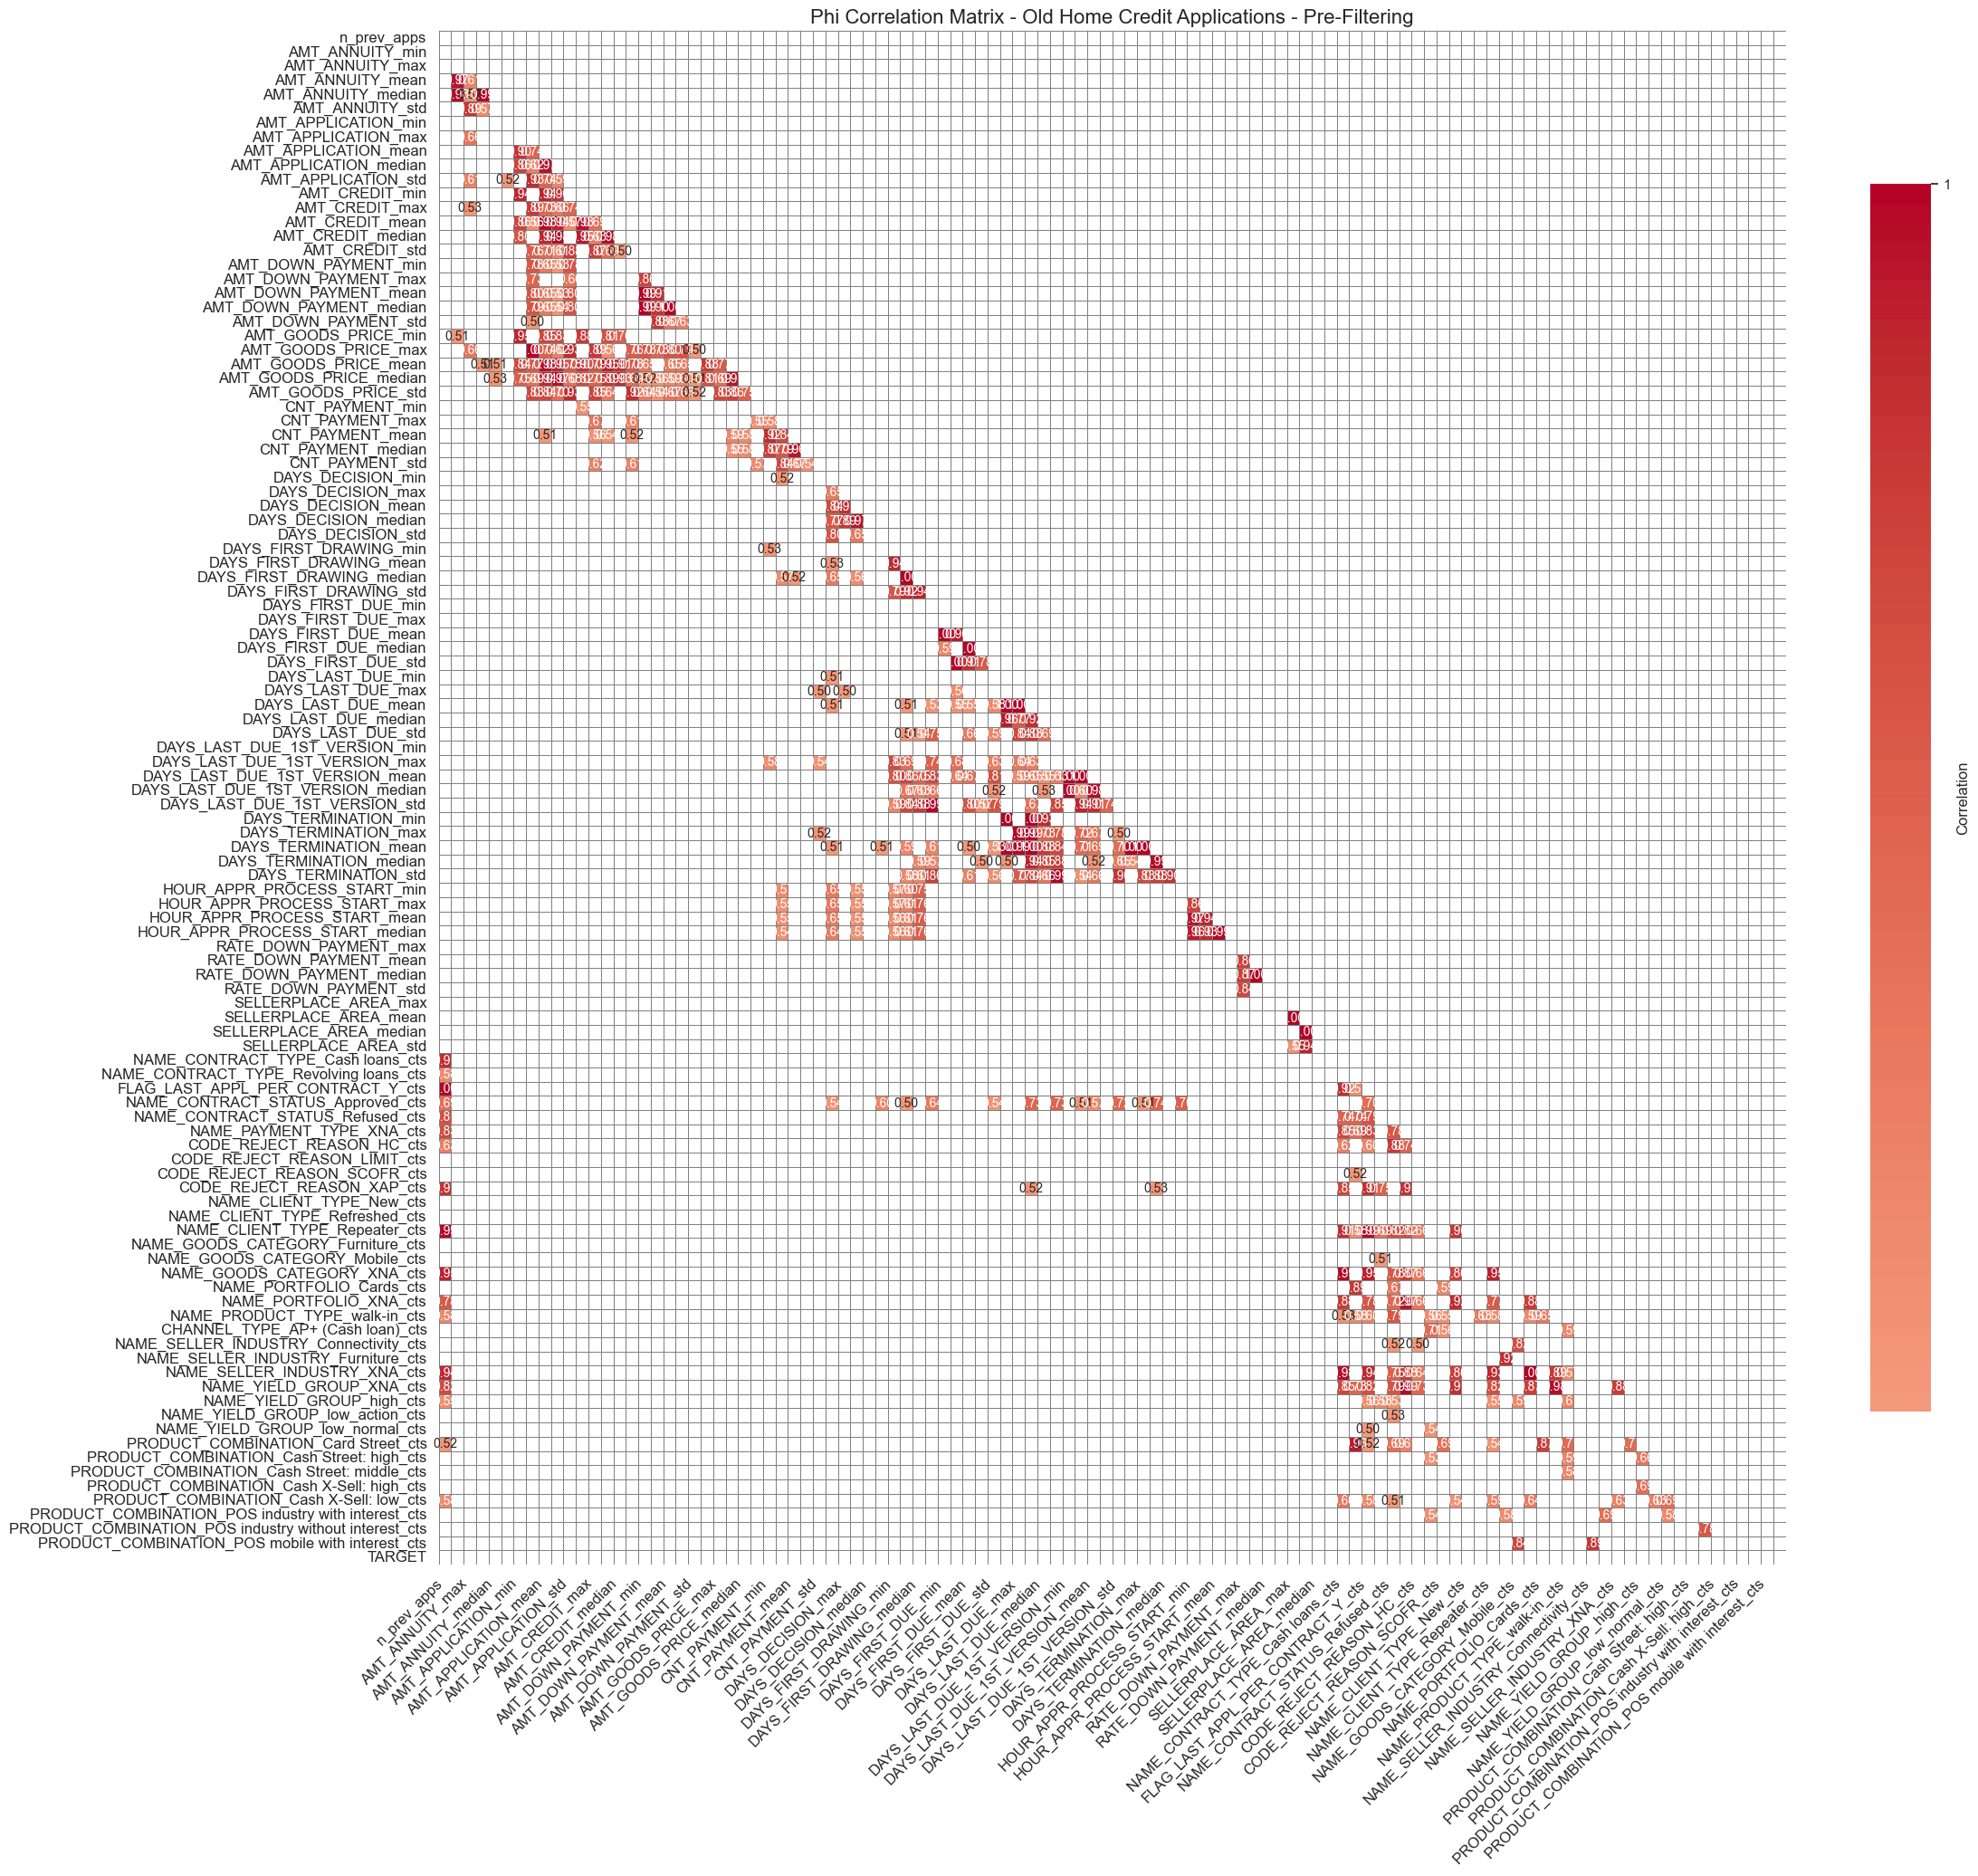

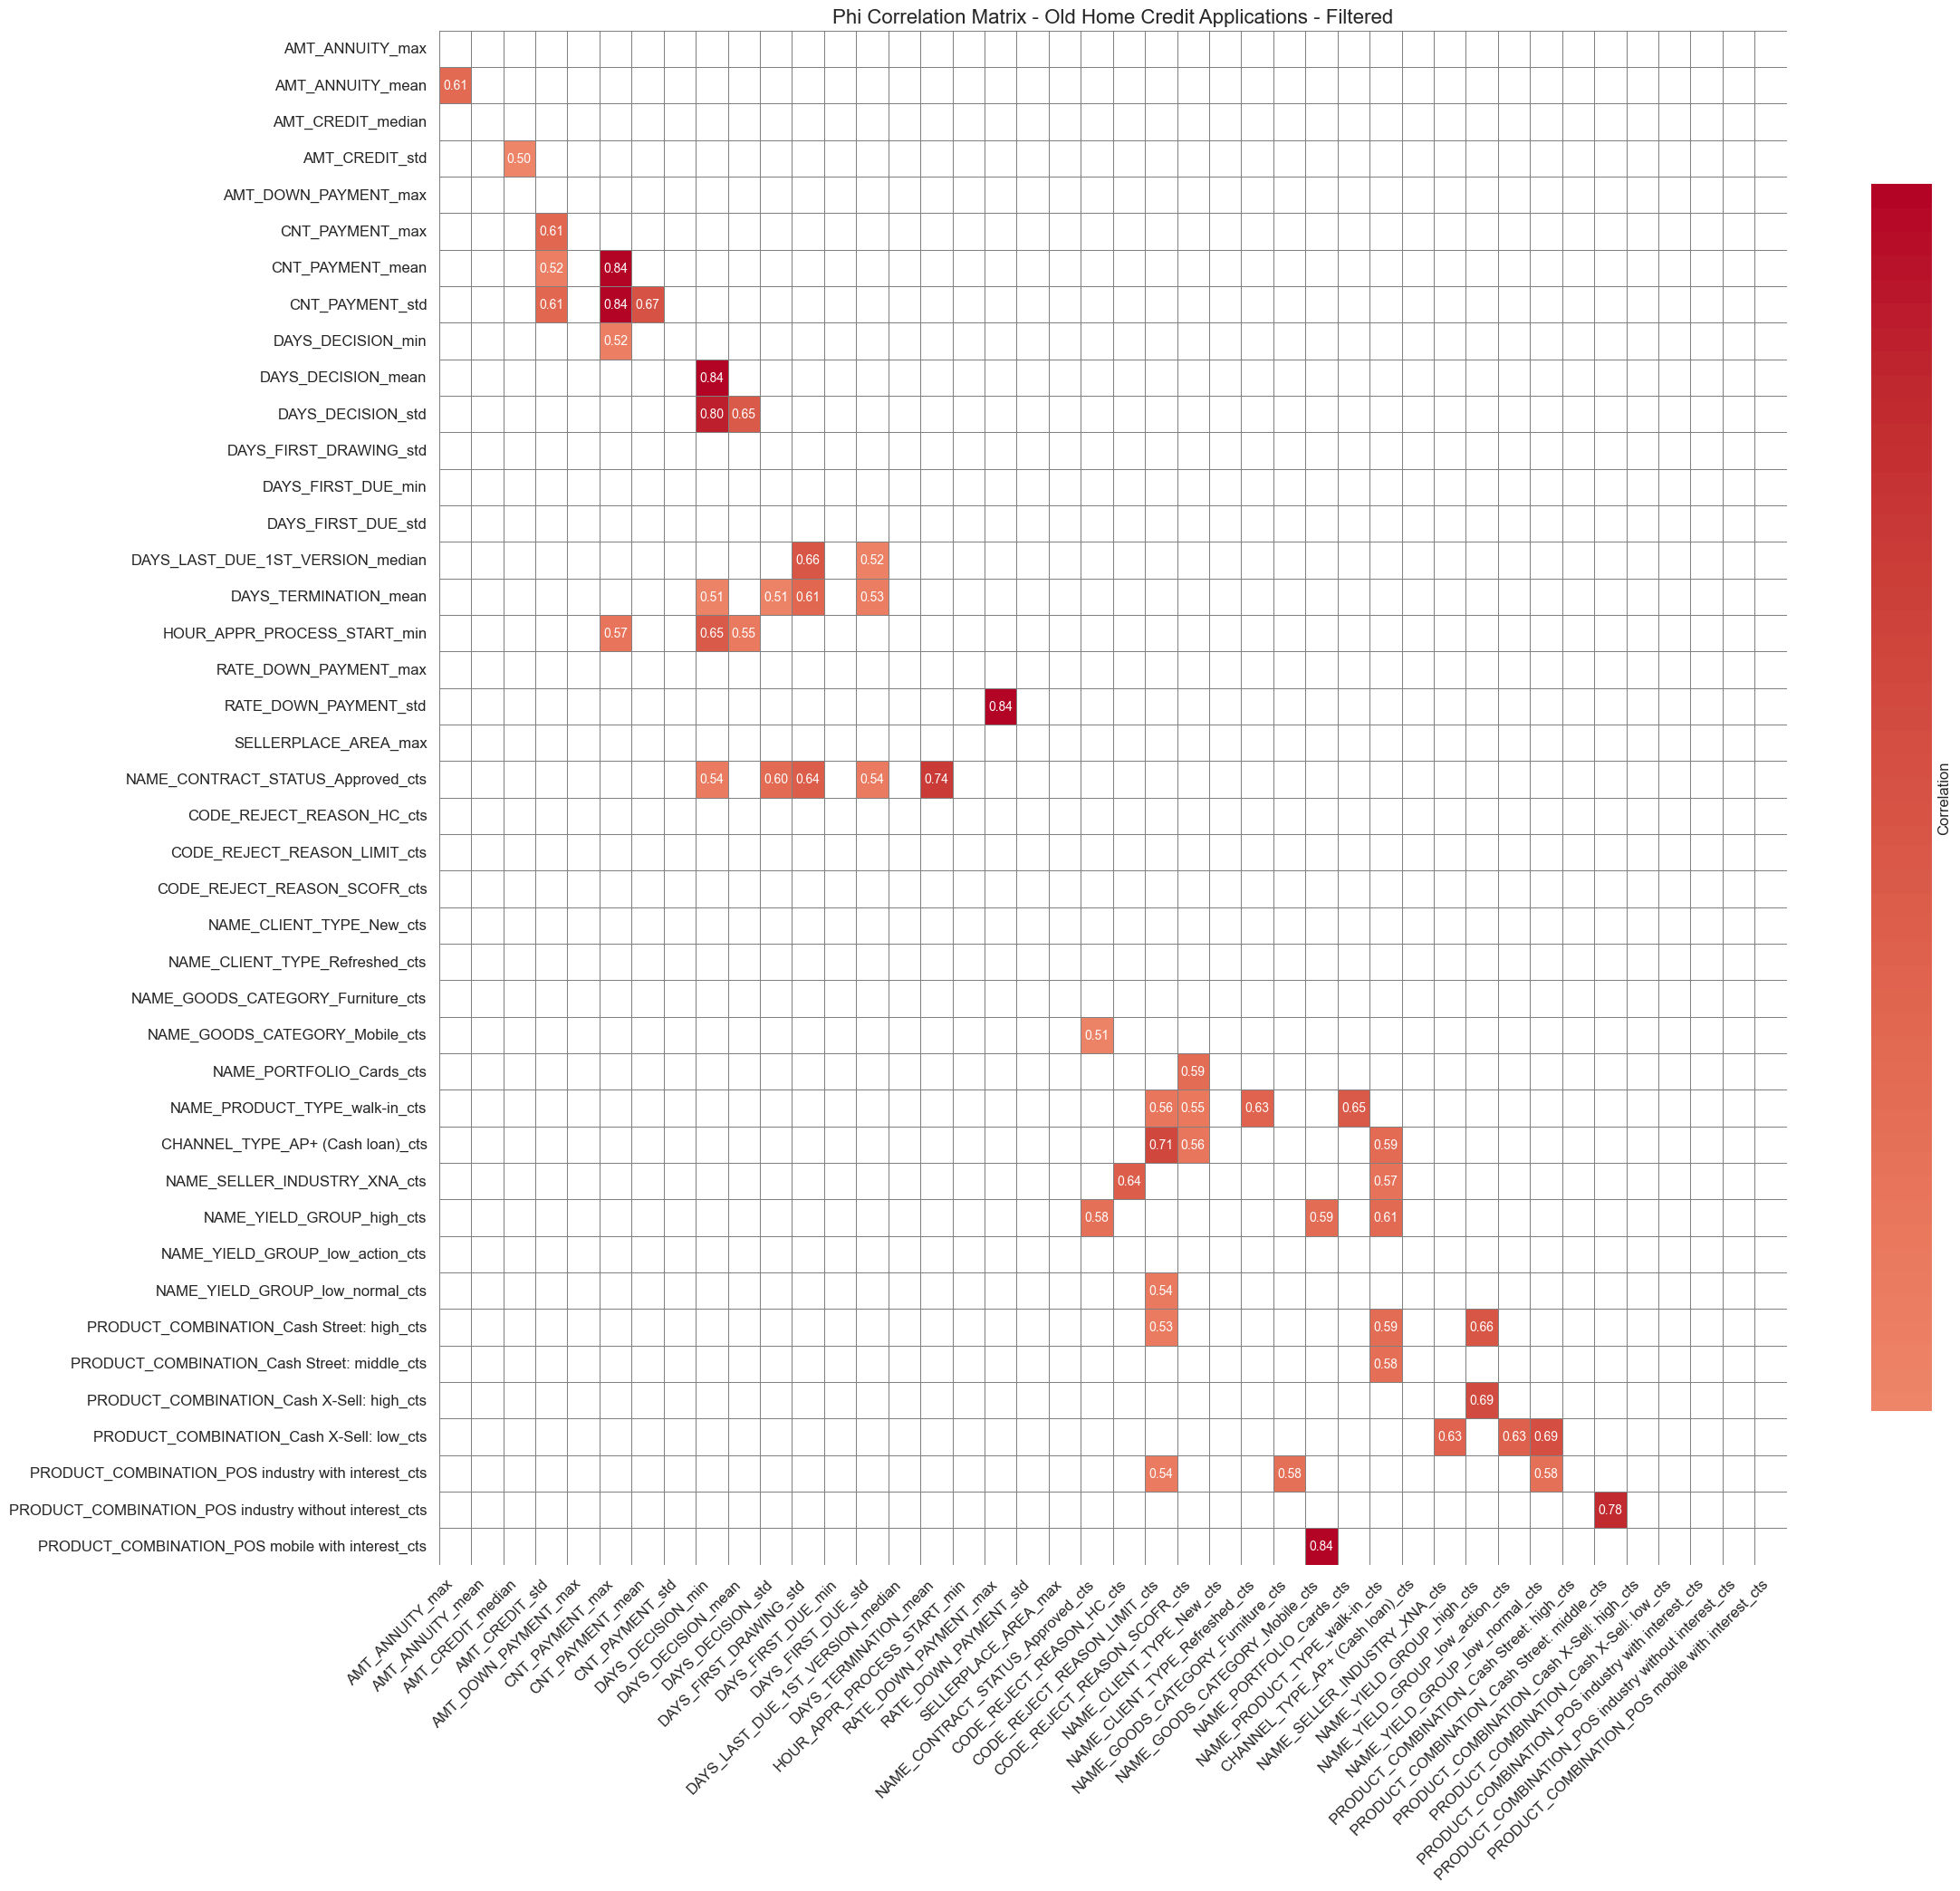

In [15]:
old_apps_phik = pd.concat([old_apps_boruta, y_train], axis=1).phik_matrix(verbose=False)
ax0 = plot_correlation_matrix(
    old_apps_phik,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Old Home Credit Applications - Pre-Filtering",
)
old_apps_phik_mat = correlation_threshold(old_apps_phik, threshold=0.85)
old_apps_filtered = drop_least_target_correlated_features(
    old_apps_phik_mat.copy(), old_apps_phik["TARGET"].copy(), old_apps_boruta.copy()
)
old_apps_phik_filtered = old_apps_filtered.phik_matrix(verbose=False)
ax1 = plot_correlation_matrix(
    old_apps_phik_filtered,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Old Home Credit Applications - Filtered",
)

After applying this filter I will also choose to include "n_prev_apps" because I believe it carries unique information (although correlated with other features)

In [16]:
old_app_col_filter = list(
    ["SK_ID_CURR"] + ["n_prev_apps"] + list(old_apps_filtered.columns)
)
old_apps = old_apps_df[old_app_col_filter]
old_apps

SK_ID_CURR  n_prev_apps  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0           100001            1       3951.00000        3951.00000   
1           100002            1       9251.77539        9251.77539   
2           100003            3      98356.99219       56553.98828   
3           100004            1       5357.25000        5357.25000   
4           100005            2       4813.20020        4813.20020   
...            ...          ...              ...               ...   
338852      456251            1       6605.91016        6605.91016   
338853      456252            1      10074.46484       10074.46484   
338854      456253            2       5567.71484        4770.40479   
338855      456254            2      19065.82422       10681.13184   
338856      456255            8      54022.14062       20775.39062   

        AMT_CREDIT_median  AMT_CREDIT_std  AMT_DOWN_PAYMENT_max  \
0             23787.00000         0.00000            2520.00000   
1            179055.00000         0.00000               0.00000   
2            348637.50000    497949.86181            6885.00000   
3             20106.00000         0.00000            4860.00000   
4             20076.75000     28392.81214            4464.00000   
...                   ...             ...                   ...   
338852        40455.00000         0.00000               0.00000   
338853        56821.50000         0.00000            3456.00000   
338854        20625.75000      9447.30015            5913.00000   
338855       134439.75000    159783.15158               0.00000   
338856       183577.50000    485561.70563            9000.00000   

        CNT_PAYMENT_max  CNT_PAYMENT_mean  CNT_PAYMENT_std  ...  \
0               8.00000           8.00000          0.00000  ...   
1              24.00000          24.00000          0.00000  ...   
2              12.00000          10.00000          3.46410  ...   
3               4.00000           4.00000          0.00000  ...   
4              12.00000          12.00000          0.00000  ...   
...                 ...               ...              ...  ...   
338852          8.00000           8.00000          0.00000  ...   
338853          6.00000           6.00000          0.00000  ...   
338854          6.00000           5.00000          1.41421  ...   
338855         16.00000          15.00000          1.41421  ...   
338856         60.00000          21.75000         19.22610  ...   

        NAME_YIELD_GROUP_high_cts  NAME_YIELD_GROUP_low_action_cts  \
0                               1                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               1                                0   
...                           ...                              ...   
338852                          1                                0   
338853                          0                                0   
338854                          2                                0   
338855                          1                                0   
338856                          2                                0   

        NAME_YIELD_GROUP_low_normal_cts  \
0                                     0   
1                                     1   
2                                     1   
3                                     0   
4                                     0   
...                                 ...   
338852                                0   
338853                                1   
338854                                0   
338855                                1   
338856                                2   

        PRODUCT_COMBINATION_Cash Street: high_cts  \
0                                               0   
1                                               0   
2                                       

__Previous Home Credit Payments__

In [17]:
past_payment_feat_sel = pd.merge(
    X_train["SK_ID_CURR"], past_payment_df, on="SK_ID_CURR", how="left"
)
past_payment_feat_sel = past_payment_feat_sel.fillna(0)
past_payment_boruta, _ = boruta_feature_selection(
    past_payment_feat_sel, y_train.values.ravel()
)

Iteration: 	1 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	2 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	3 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	4 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	5 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	6 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	7 / 40
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	8 / 40
Confirmed: 	30
Tentative: 	2
Rejected: 	0
Iteration: 	9 / 40
Confirmed: 	30
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	10 / 40
Confirmed: 	30
Tentative: 	0
Rejected: 	2


In [18]:
past_payment_boruta.to_pickle(
    "../data/aggregated_supplementary_data/past_payment_boruta.pkl"
)

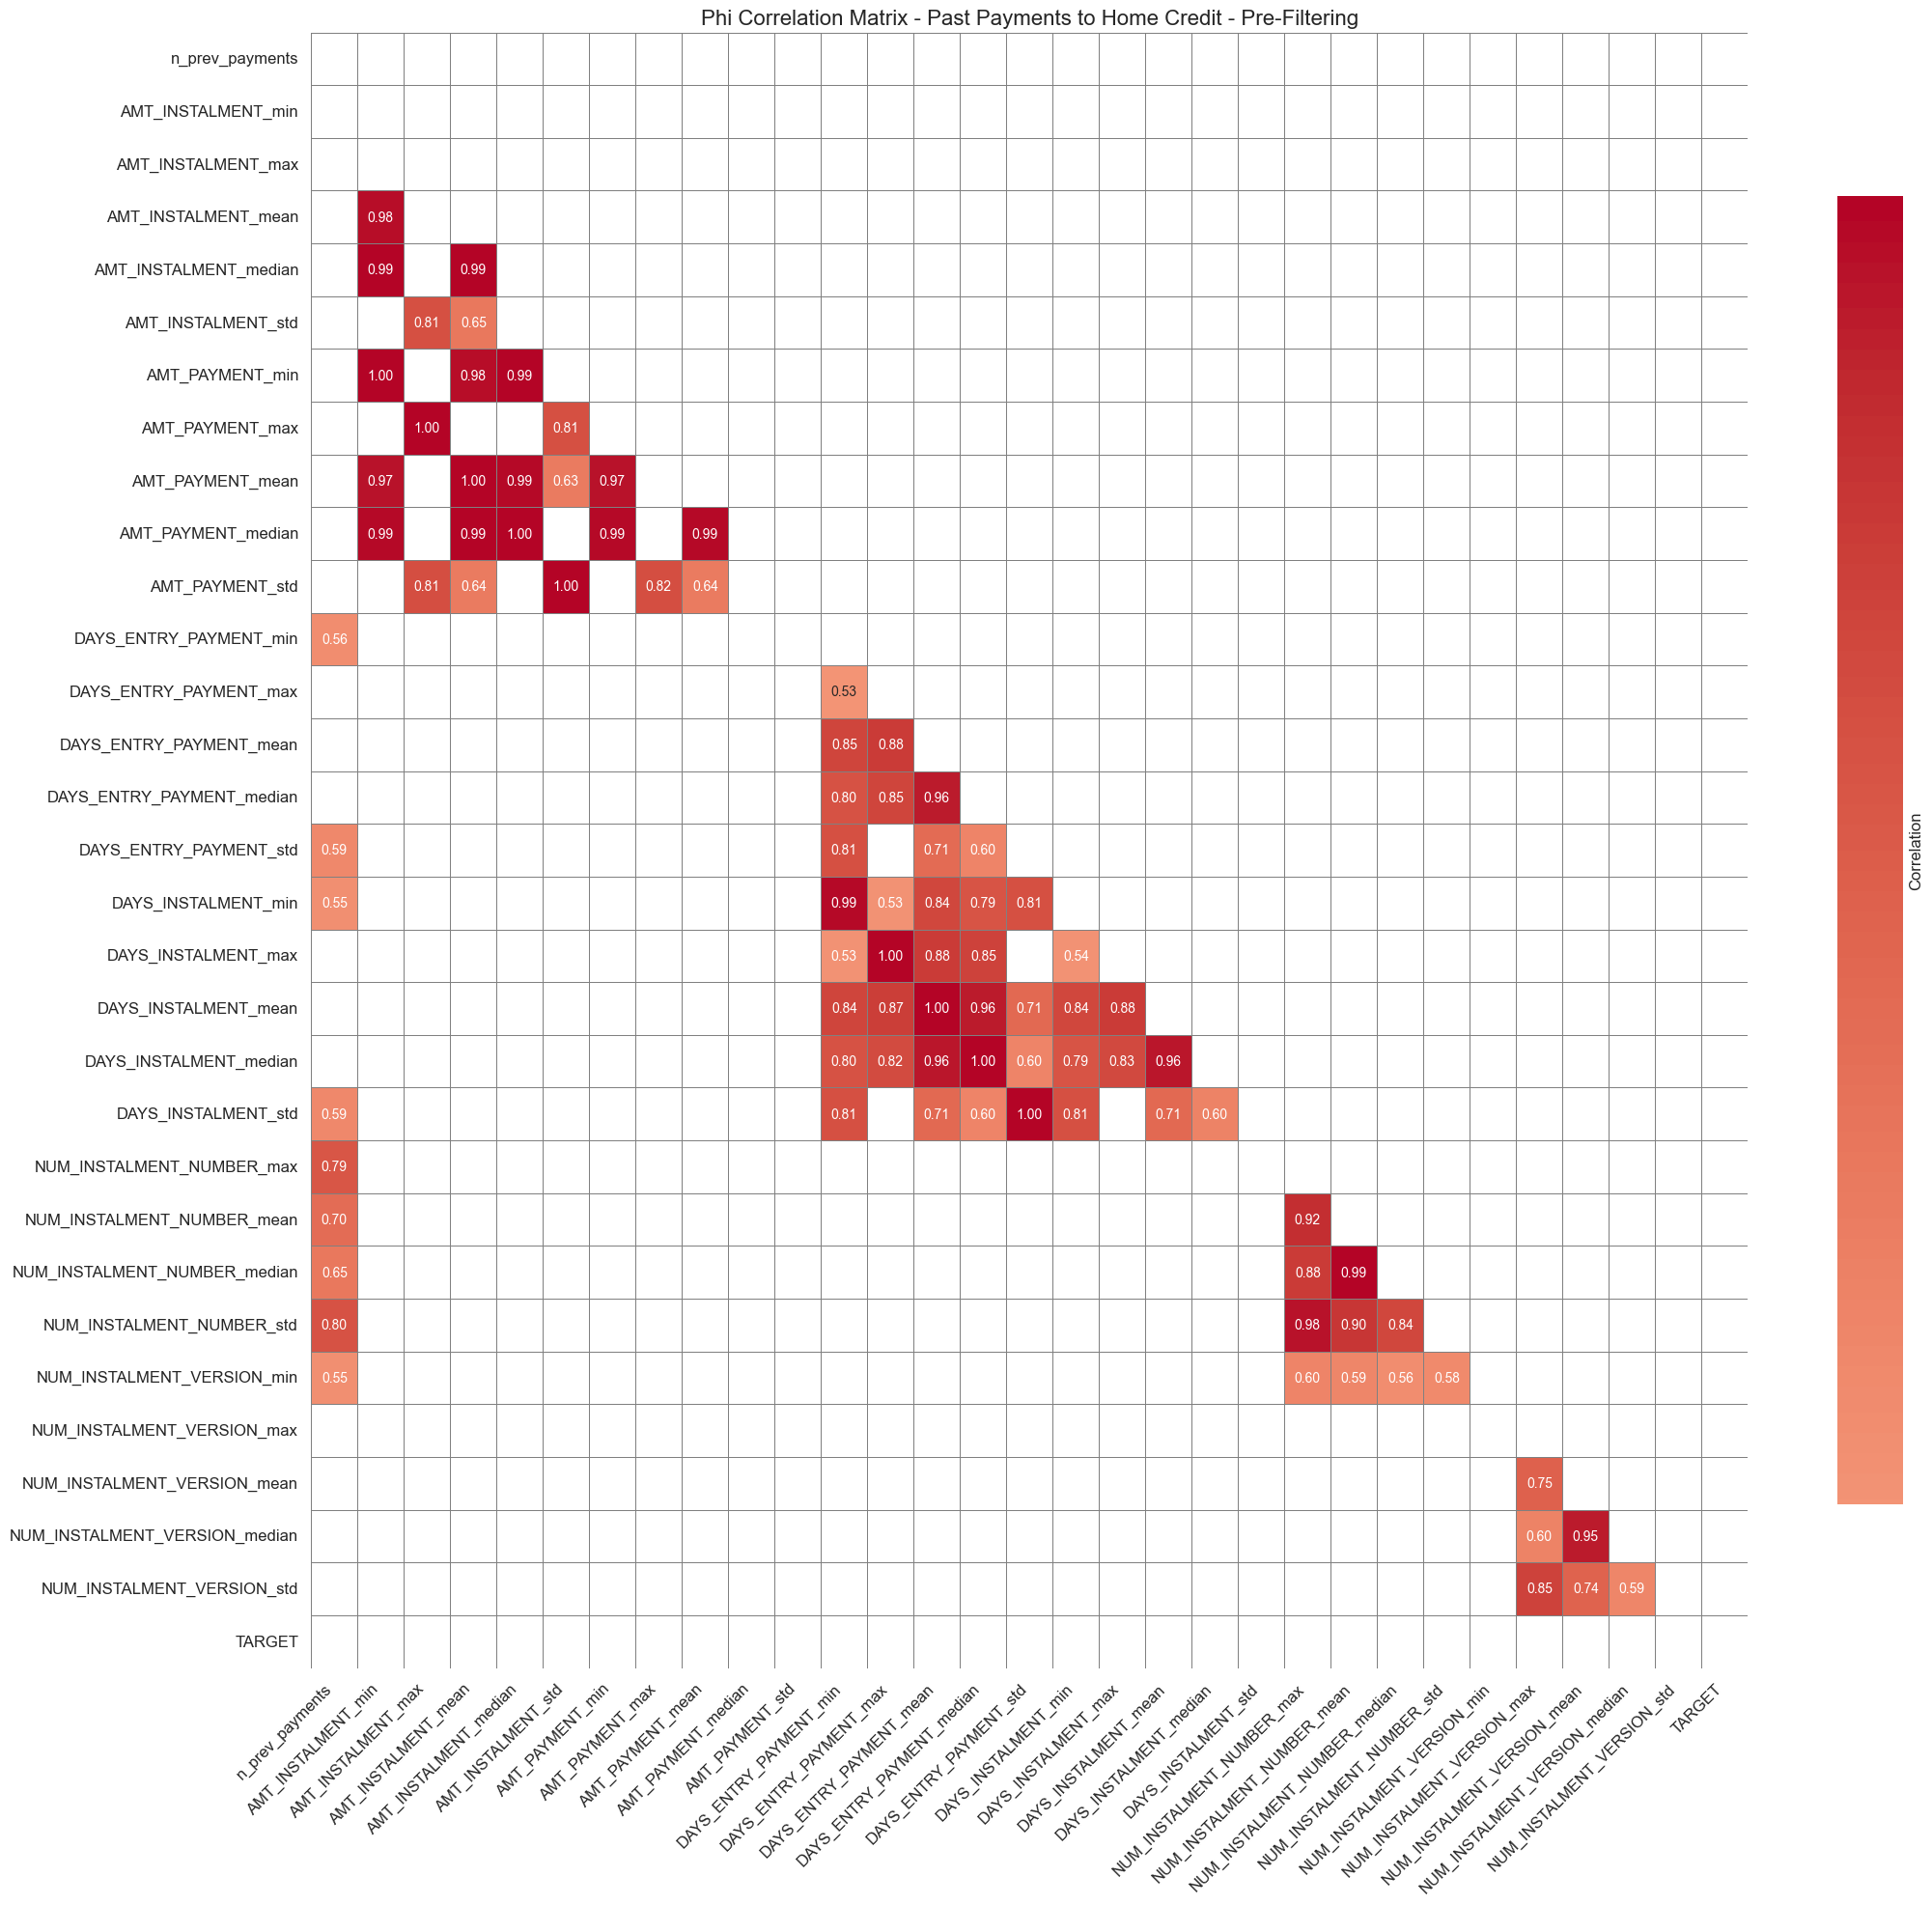

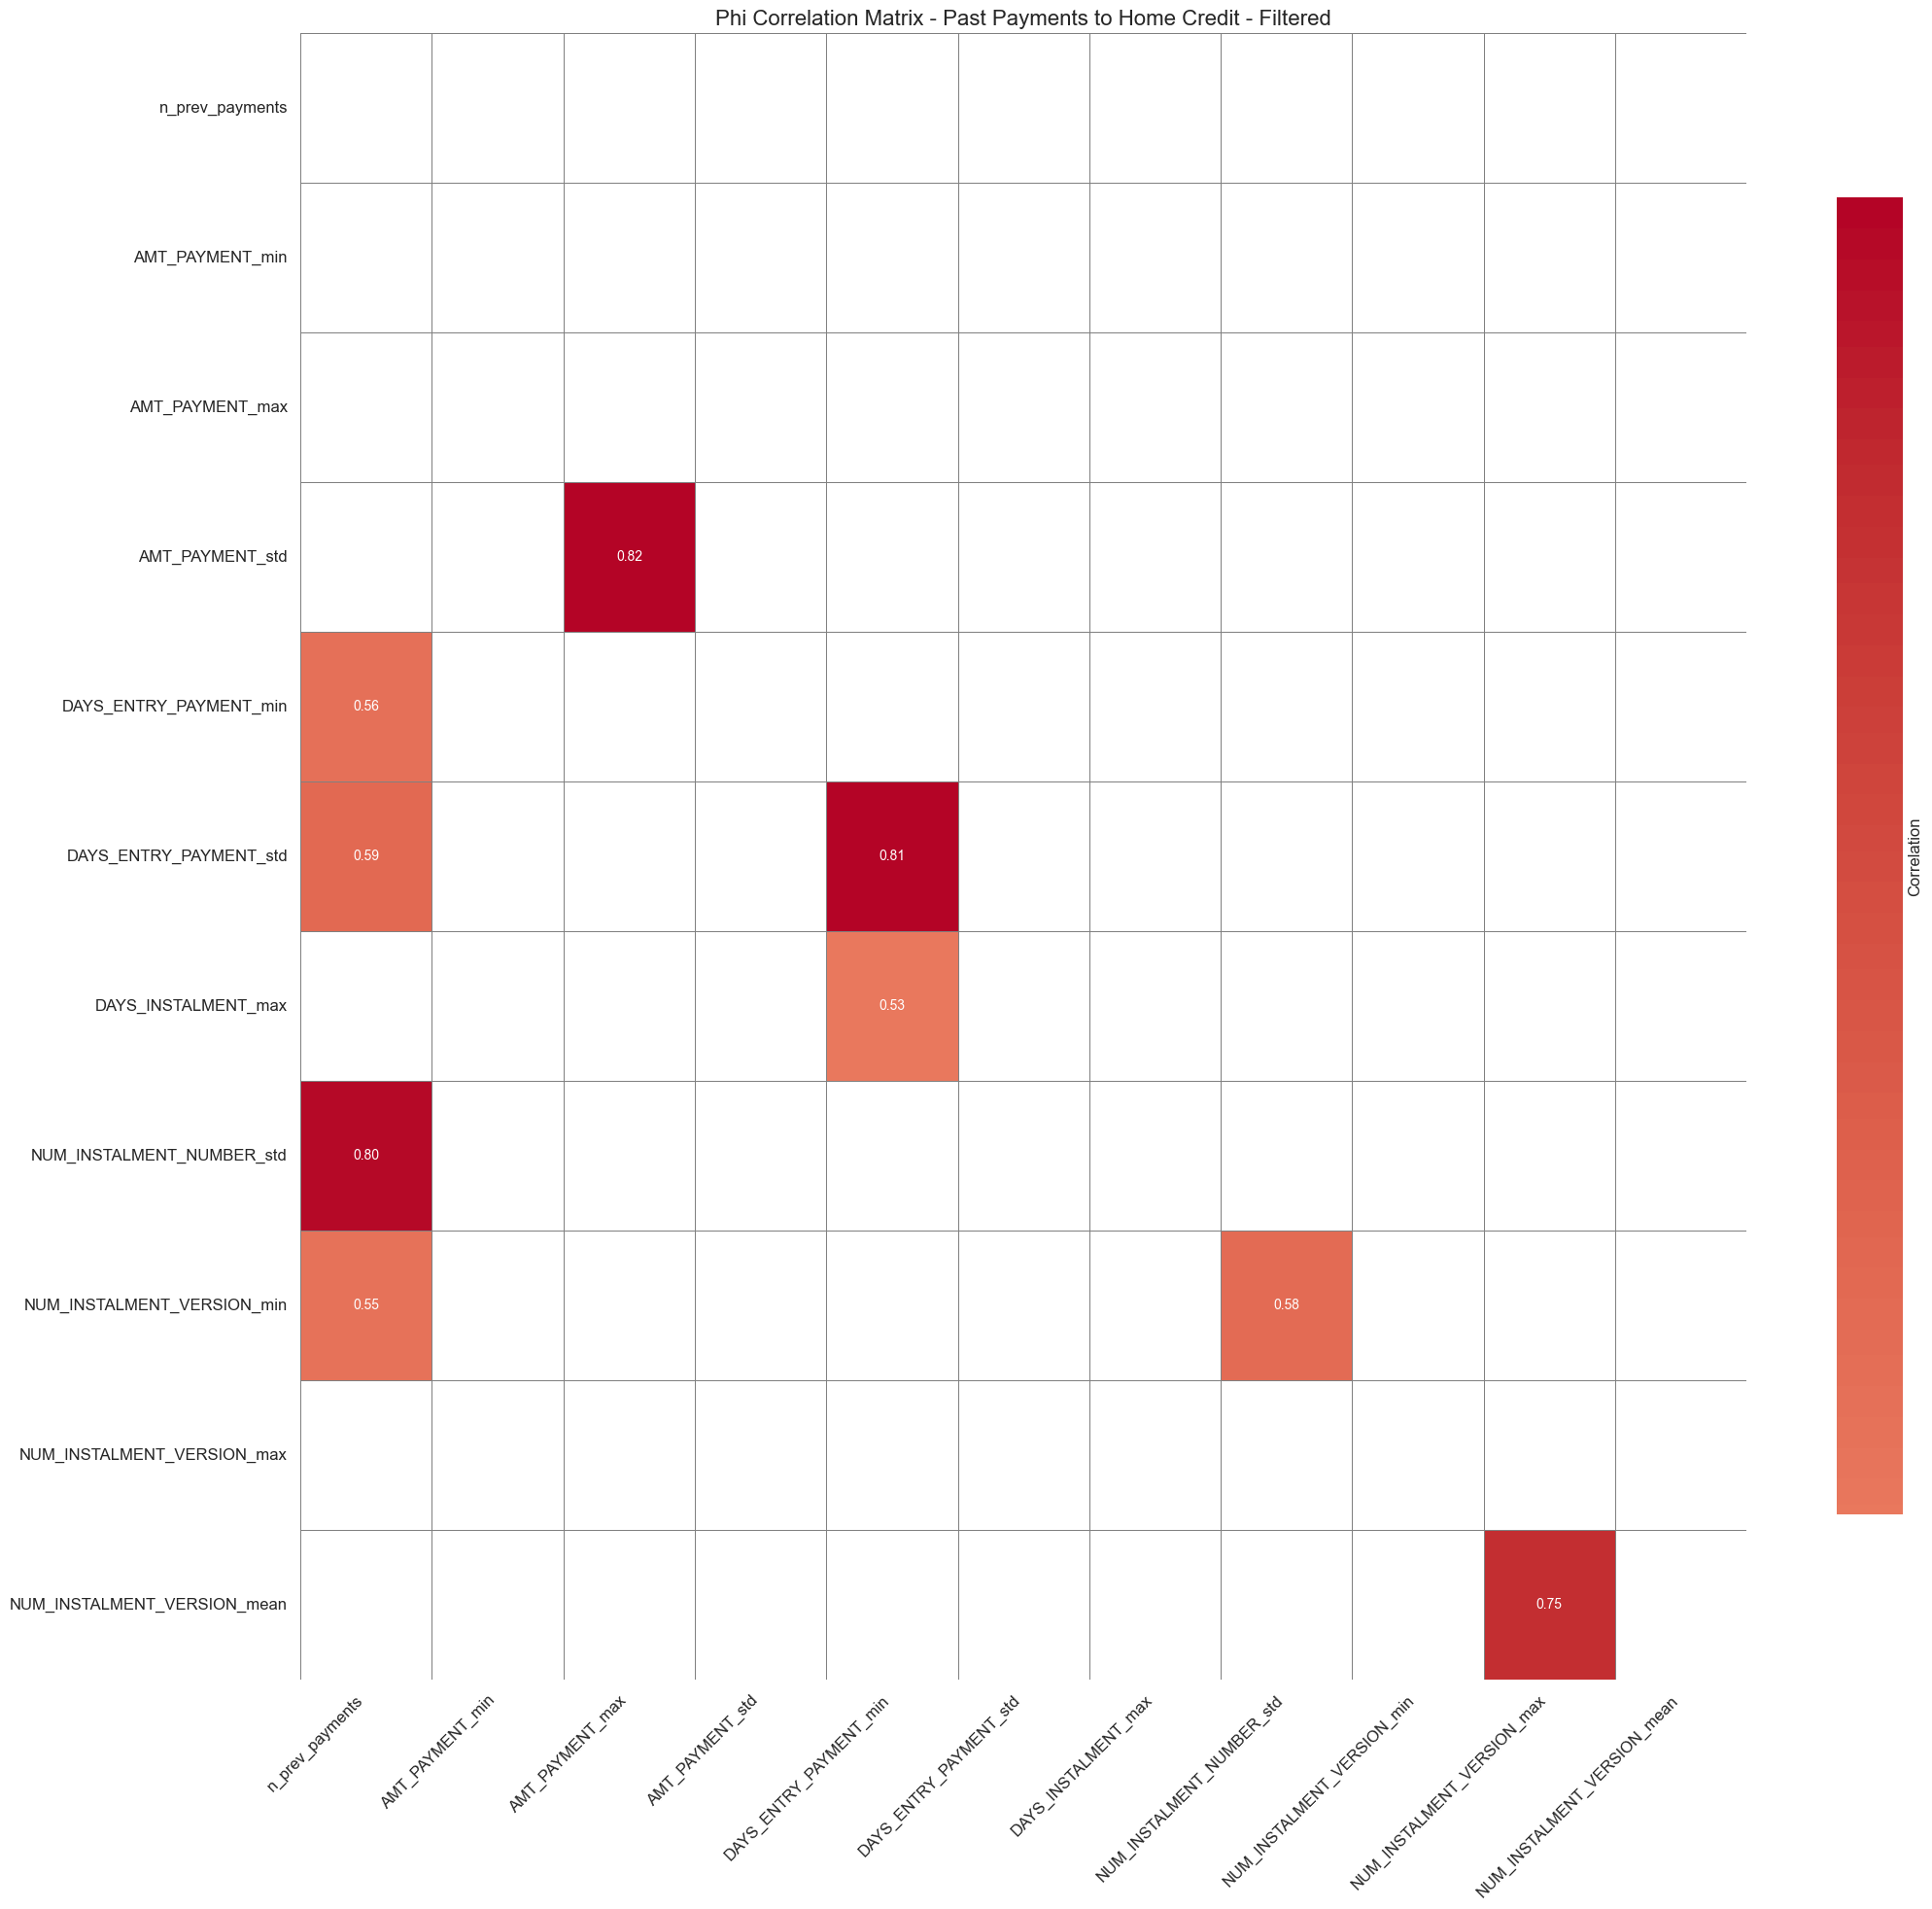

In [19]:
past_payment_phik = pd.concat([past_payment_boruta, y_train], axis=1).phik_matrix(
    verbose=False
)
ax0 = plot_correlation_matrix(
    past_payment_phik,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Past Payments to Home Credit - Pre-Filtering",
)
past_payment_phik_mat = correlation_threshold(past_payment_phik, threshold=0.85)
past_payment_filtered = drop_least_target_correlated_features(
    past_payment_phik_mat.copy(),
    past_payment_phik["TARGET"].copy(),
    past_payment_boruta.copy(),
)
past_payment_phik_filtered = past_payment_filtered.phik_matrix(verbose=False)
ax1 = plot_correlation_matrix(
    past_payment_phik_filtered,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Past Payments to Home Credit - Filtered",
)

In [20]:
past_payment_col_filter = list(["SK_ID_CURR"] + list(past_payment_filtered.columns))
past_payment = past_payment_df[past_payment_col_filter]
past_payment

SK_ID_CURR  n_prev_payments  AMT_PAYMENT_min  AMT_PAYMENT_max  \
0           100001                7       3951.00000      17397.90039   
1           100002               19       9251.77539      53093.74609   
2           100003               25       6662.97021     560835.37500   
3           100004                3       5357.25000      10573.96484   
4           100005                9       4813.20020      17656.24414   
...            ...              ...              ...              ...   
339582      456251                7       6605.91016      12815.00977   
339583      456252                6      10046.87988      10074.46484   
339584      456253               14         27.27000       5575.18506   
339585      456254               19       2296.43994      19065.82422   
339586      456255               74         34.96500     669251.62500   

        AMT_PAYMENT_std  DAYS_ENTRY_PAYMENT_min  DAYS_ENTRY_PAYMENT_std  \
0            5076.67676             -2916.00000               644.08033   
1           10058.03788              -587.00000               172.05888   
2          110542.59487             -2324.00000               757.36841   
3            3011.87172              -795.00000                34.01960   
4            4281.01465              -736.00000                90.55400   
...                 ...                     ...                     ...   
339582       2346.81906              -237.00000                70.48573   
339583         11.26151             -2470.00000                53.31291   
339584       1638.22870             -2916.00000               518.61731   
339585       8602.51262              -317.00000                87.28742   
339586     115619.97005              -972.00000               222.61814   

        DAYS_INSTALMENT_max  NUM_INSTALMENT_NUMBER_std  \
0               -1619.00000                    1.11270   
1                 -25.00000                    5.62731   
2                -536.00000                    3.13475   
3                -724.00000                    1.00000   
4                -466.00000                    2.73861   
...                     ...                        ...   
339582            -30.00000                    2.16025   
339583          -2316.00000                    1.87083   
339584          -1716.00000                    3.66225   
339585             -7.00000                    2.82532   
339586            -66.00000                    6.59531   

        NUM_INSTALMENT_VERSION_min  NUM_INSTALMENT_VERSION_max  \
0                          1.00000                     2.00000   
1                          1.00000                     2.00000   
2                          1.00000                     2.00000   
3                          1.00000                     2.00000   
4                          1.00000                     2.00000   
...                            ...                         ...   
339582                     1.00000                     2.00000   
339583                     1.00000                     1.00000   
339584                     1.00000                     1.00000   
339585                     1.00000                     1.00000   
339586                     1.00000                     4.00000   

        NUM_INSTALMENT_VERSION_mean  
0                           1.14286  
1                           1.05263  
2                           1.04000  
3                           1.33333  
4                           1.11111  
...                             ...  
339582                      1.14286  
339583                      1.00000  
339584                      1.00000  
339585                      1.00000  
339586                      1.82432  

[339587 rows x 12 columns]

__Previous Cash Balances at Home Credit__

In [21]:
old_cash_balance_feat_sel = pd.merge(
    X_train["SK_ID_CURR"], old_cash_balance_df, on="SK_ID_CURR", how="left"
)
old_cash_balance_feat_sel = old_cash_balance_feat_sel.fillna(0)
old_cash_balance_boruta, _ = boruta_feature_selection(
    old_cash_balance_feat_sel, y_train.values.ravel()
)

Iteration: 	1 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	2 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	3 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	4 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	5 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	6 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	7 / 40
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	8 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	9 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	10 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	11 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	12 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	13 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	14 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	15 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteration: 	16 / 40
Confirmed: 	23
Tentative: 	1
Rejected: 	12
Iteratio

In [22]:
old_cash_balance_boruta.to_pickle(
    "../data/aggregated_supplementary_data/old_cash_balance_boruta.pkl"
)

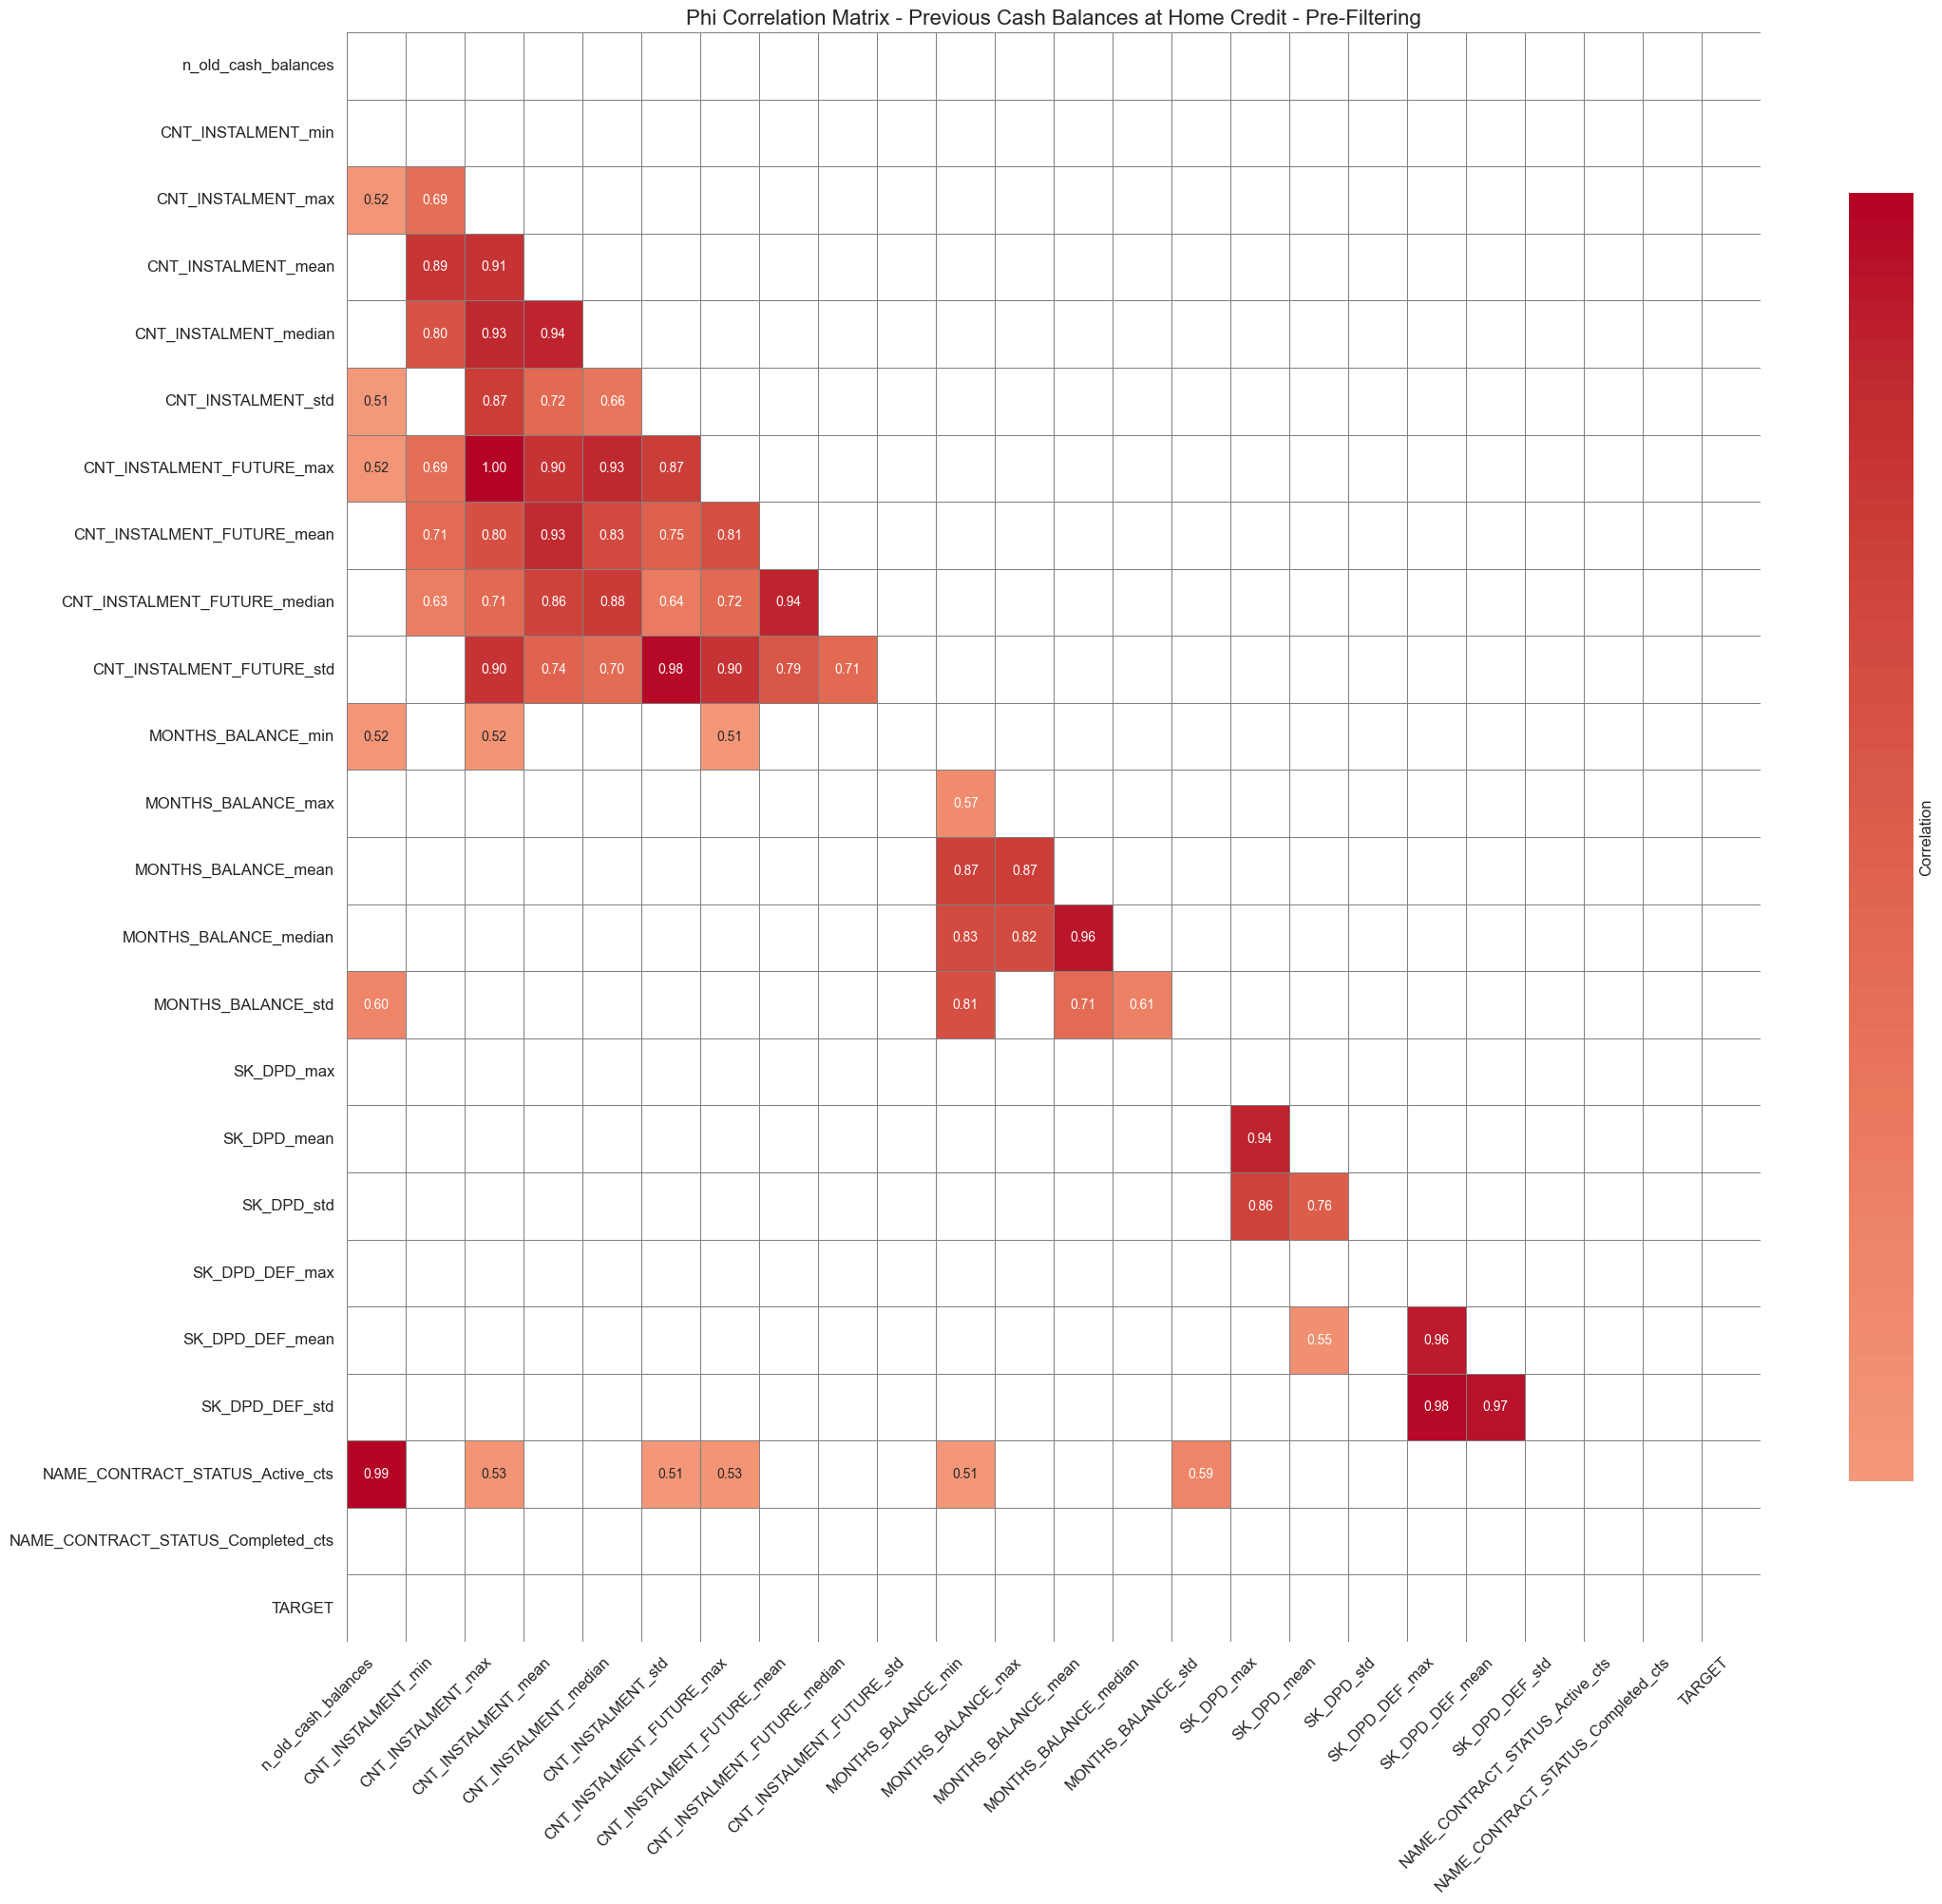

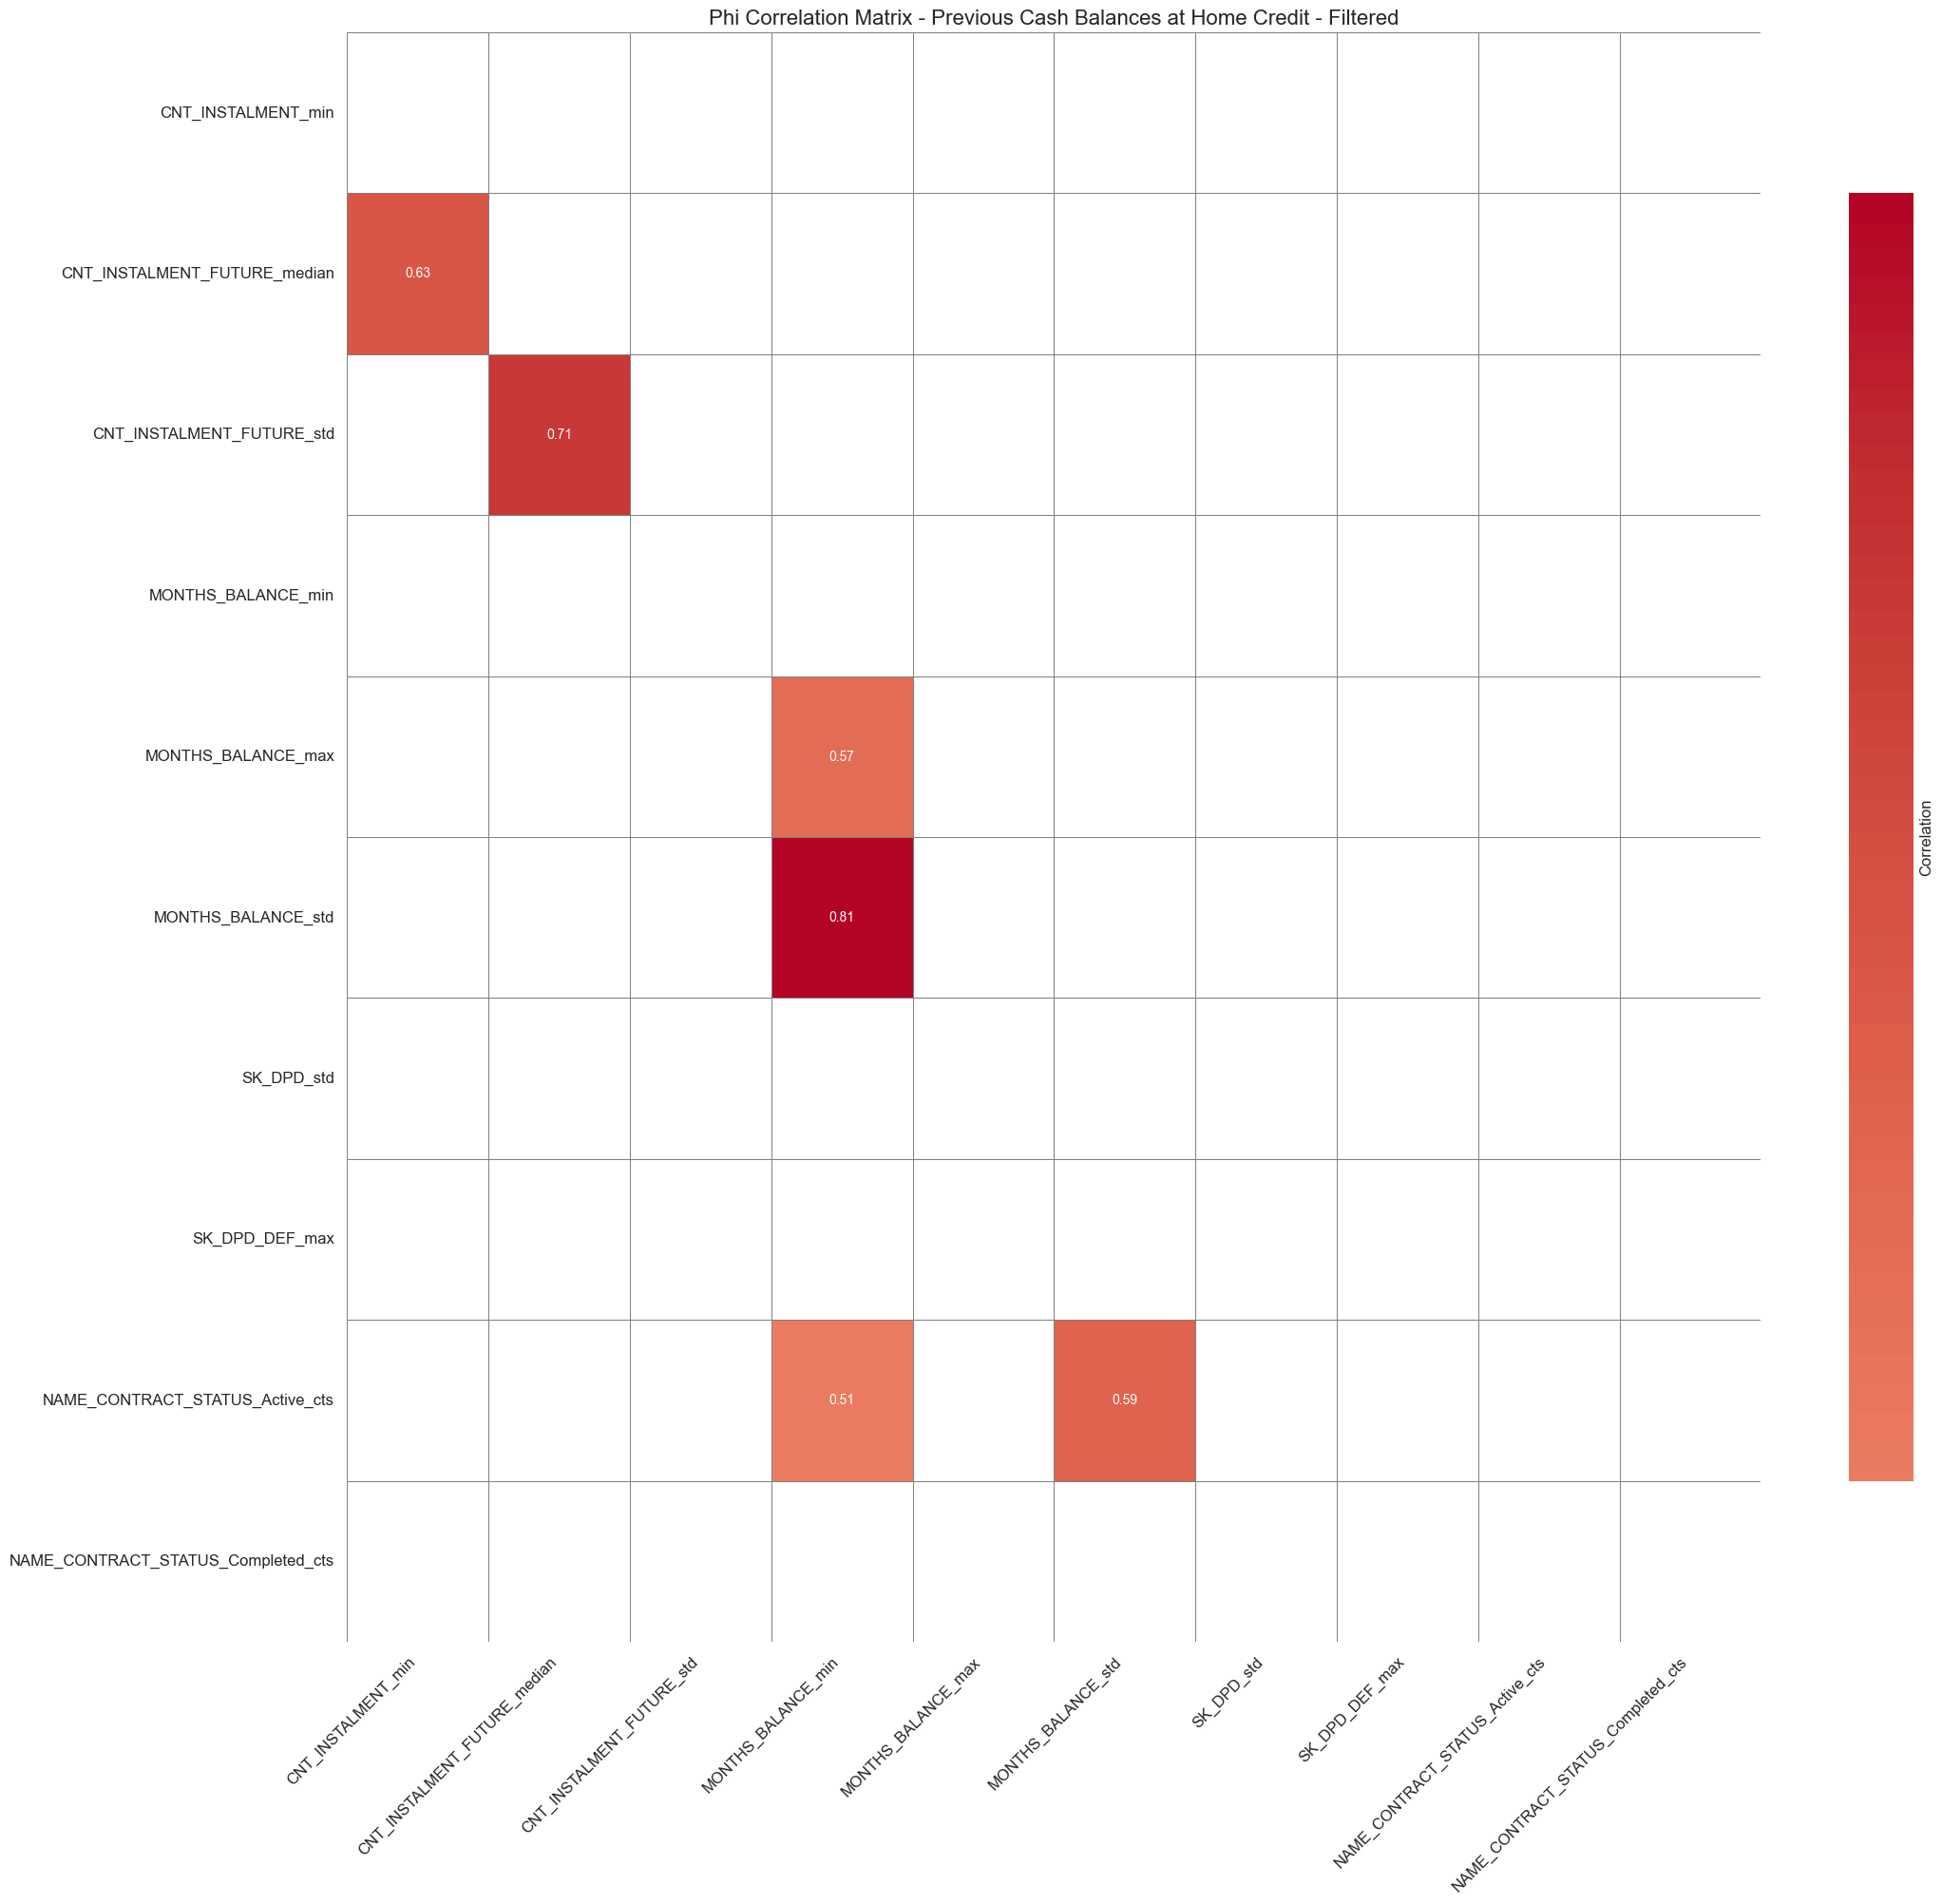

In [23]:
old_cash_balance_phik = pd.concat(
    [old_cash_balance_boruta, y_train], axis=1
).phik_matrix(verbose=False)
ax0 = plot_correlation_matrix(
    old_cash_balance_phik,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Previous Cash Balances at Home Credit - Pre-Filtering",
)
old_cash_balance_phik_mat = correlation_threshold(old_cash_balance_phik, threshold=0.85)
old_cash_balance_filtered = drop_least_target_correlated_features(
    old_cash_balance_phik_mat.copy(),
    old_cash_balance_phik["TARGET"].copy(),
    old_cash_balance_boruta.copy(),
)
old_cash_balance_phik_filtered = old_cash_balance_filtered.phik_matrix(verbose=False)
ax1 = plot_correlation_matrix(
    old_cash_balance_phik_filtered,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Previous Cash Balances at Home Credit - Filtered",
)

In [24]:
old_cash_balance_col_filter = list(
    ["SK_ID_CURR"] + ["n_old_cash_balances"] + list(old_cash_balance_filtered.columns)
)
old_cash_balance = old_cash_balance_df[old_cash_balance_col_filter]
old_cash_balance

SK_ID_CURR  n_old_cash_balances  CNT_INSTALMENT_min  \
0           100001                    9             4.00000   
1           100002                   19            24.00000   
2           100003                   28             6.00000   
3           100004                    4             3.00000   
4           100005                   11             9.00000   
...            ...                  ...                 ...   
337247      456251                    9             7.00000   
337248      456252                    7             6.00000   
337249      456253                   17             4.00000   
337250      456254                   20            14.00000   
337251      456255                   71             3.00000   

        CNT_INSTALMENT_FUTURE_median  CNT_INSTALMENT_FUTURE_std  \
0                            1.00000                    1.42400   
1                           15.00000                    5.62731   
2                            6.00000                    3.84281   
3                            2.50000                    1.70783   
4                            7.50000                    3.61478   
...                              ...                        ...   
337247                       4.50000                    2.66927   
337248                       3.00000                    2.16025   
337249                       2.00000                    1.90394   
337250                      10.50000                    3.36037   
337251                      14.00000                    9.92154   

        MONTHS_BALANCE_min  MONTHS_BALANCE_max  MONTHS_BALANCE_std  \
0                      -96                 -53            20.86331   
1                      -19                  -1             5.62731   
2                      -77                 -18            24.64016   
3                      -27                 -24             1.29099   
4                      -25                 -15             3.31662   
...                    ...                 ...                 ...   
337247                  -9                  -1             2.73861   
337248                 -82                 -76             2.16025   
337249                 -96                 -57            16.72397   
337250                 -11                  -1             3.03445   
337251                 -33                  -2             7.42693   

        SK_DPD_std  SK_DPD_DEF_max  NAME_CONTRACT_STATUS_Active_cts  \
0          2.33333               7                                7   
1          0.00000               0                               19   
2          0.00000               0                               26   
3          0.00000               0                                3   
4          0.00000               0                                9   
...            ...             ...                              ...   
337247     0.00000               0                                7   
337248     0.00000               0                                6   
337249     1.21268               5                               15   
337250     0.00000               0                               20   
337251     0.59339               5                               65   

        NAME_CONTRACT_STATUS_Completed_cts  
0                                        2  
1                                        0  
2                                        2  
3                                        1  
4                                        1  
...                                    ...  
337247                                   1  
337248                                   1  
337249                                   2  
337250                                   0  
337251                                   6  

[337252 rows x 12 columns]

__Previous Credit Balances at Home Credit__

In [25]:
old_credit_balance_feat_sel = pd.merge(
    X_train["SK_ID_CURR"], old_credit_balance_df, on="SK_ID_CURR", how="left"
)
old_credit_balance_feat_sel = old_credit_balance_feat_sel.fillna(0)
old_credit_balance_boruta, _ = boruta_feature_selection(
    old_credit_balance_feat_sel, y_train.values.ravel()
)

Iteration: 	1 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	2 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	3 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	4 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	5 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	6 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	7 / 40
Confirmed: 	0
Tentative: 	109
Rejected: 	0
Iteration: 	8 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	9 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	10 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	11 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	12 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	13 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	14 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	15 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
Iteration: 	16 / 40
Confirmed: 	66
Tentative: 	8
Rejected: 	35
I

In [26]:
old_credit_balance_boruta.to_pickle(
    "../data/aggregated_supplementary_data/old_credit_balance_boruta.pkl"
)

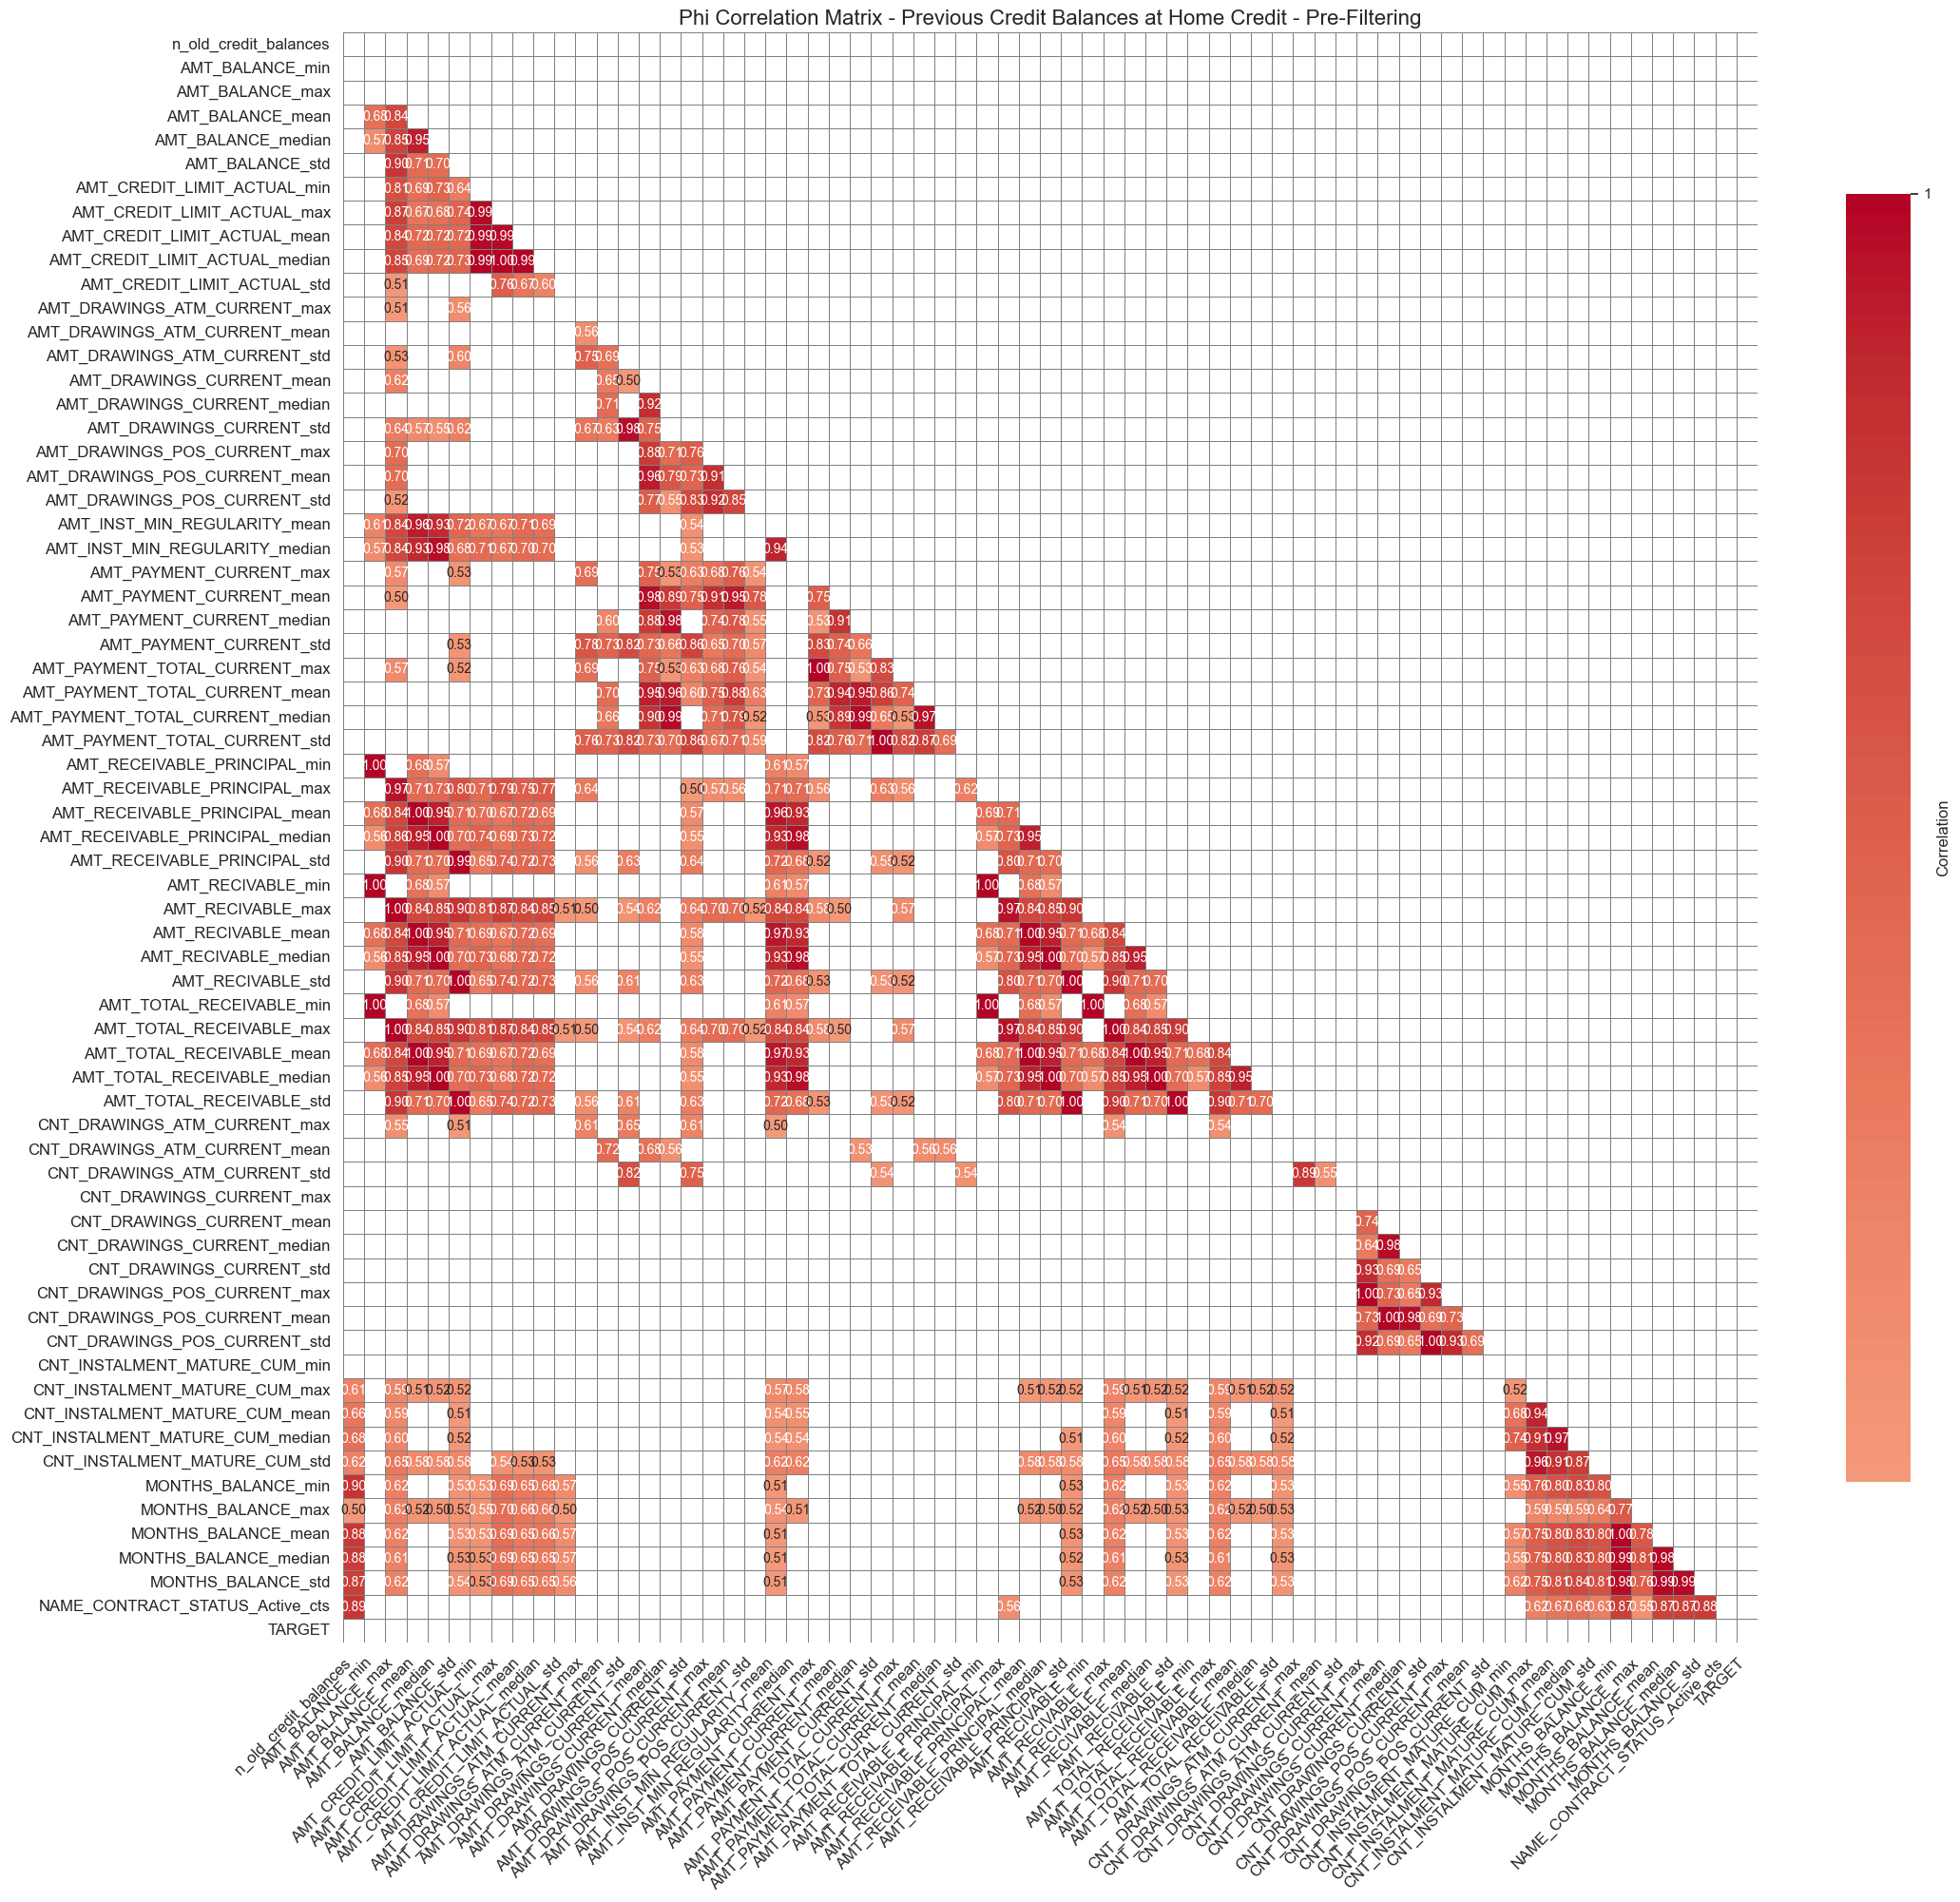

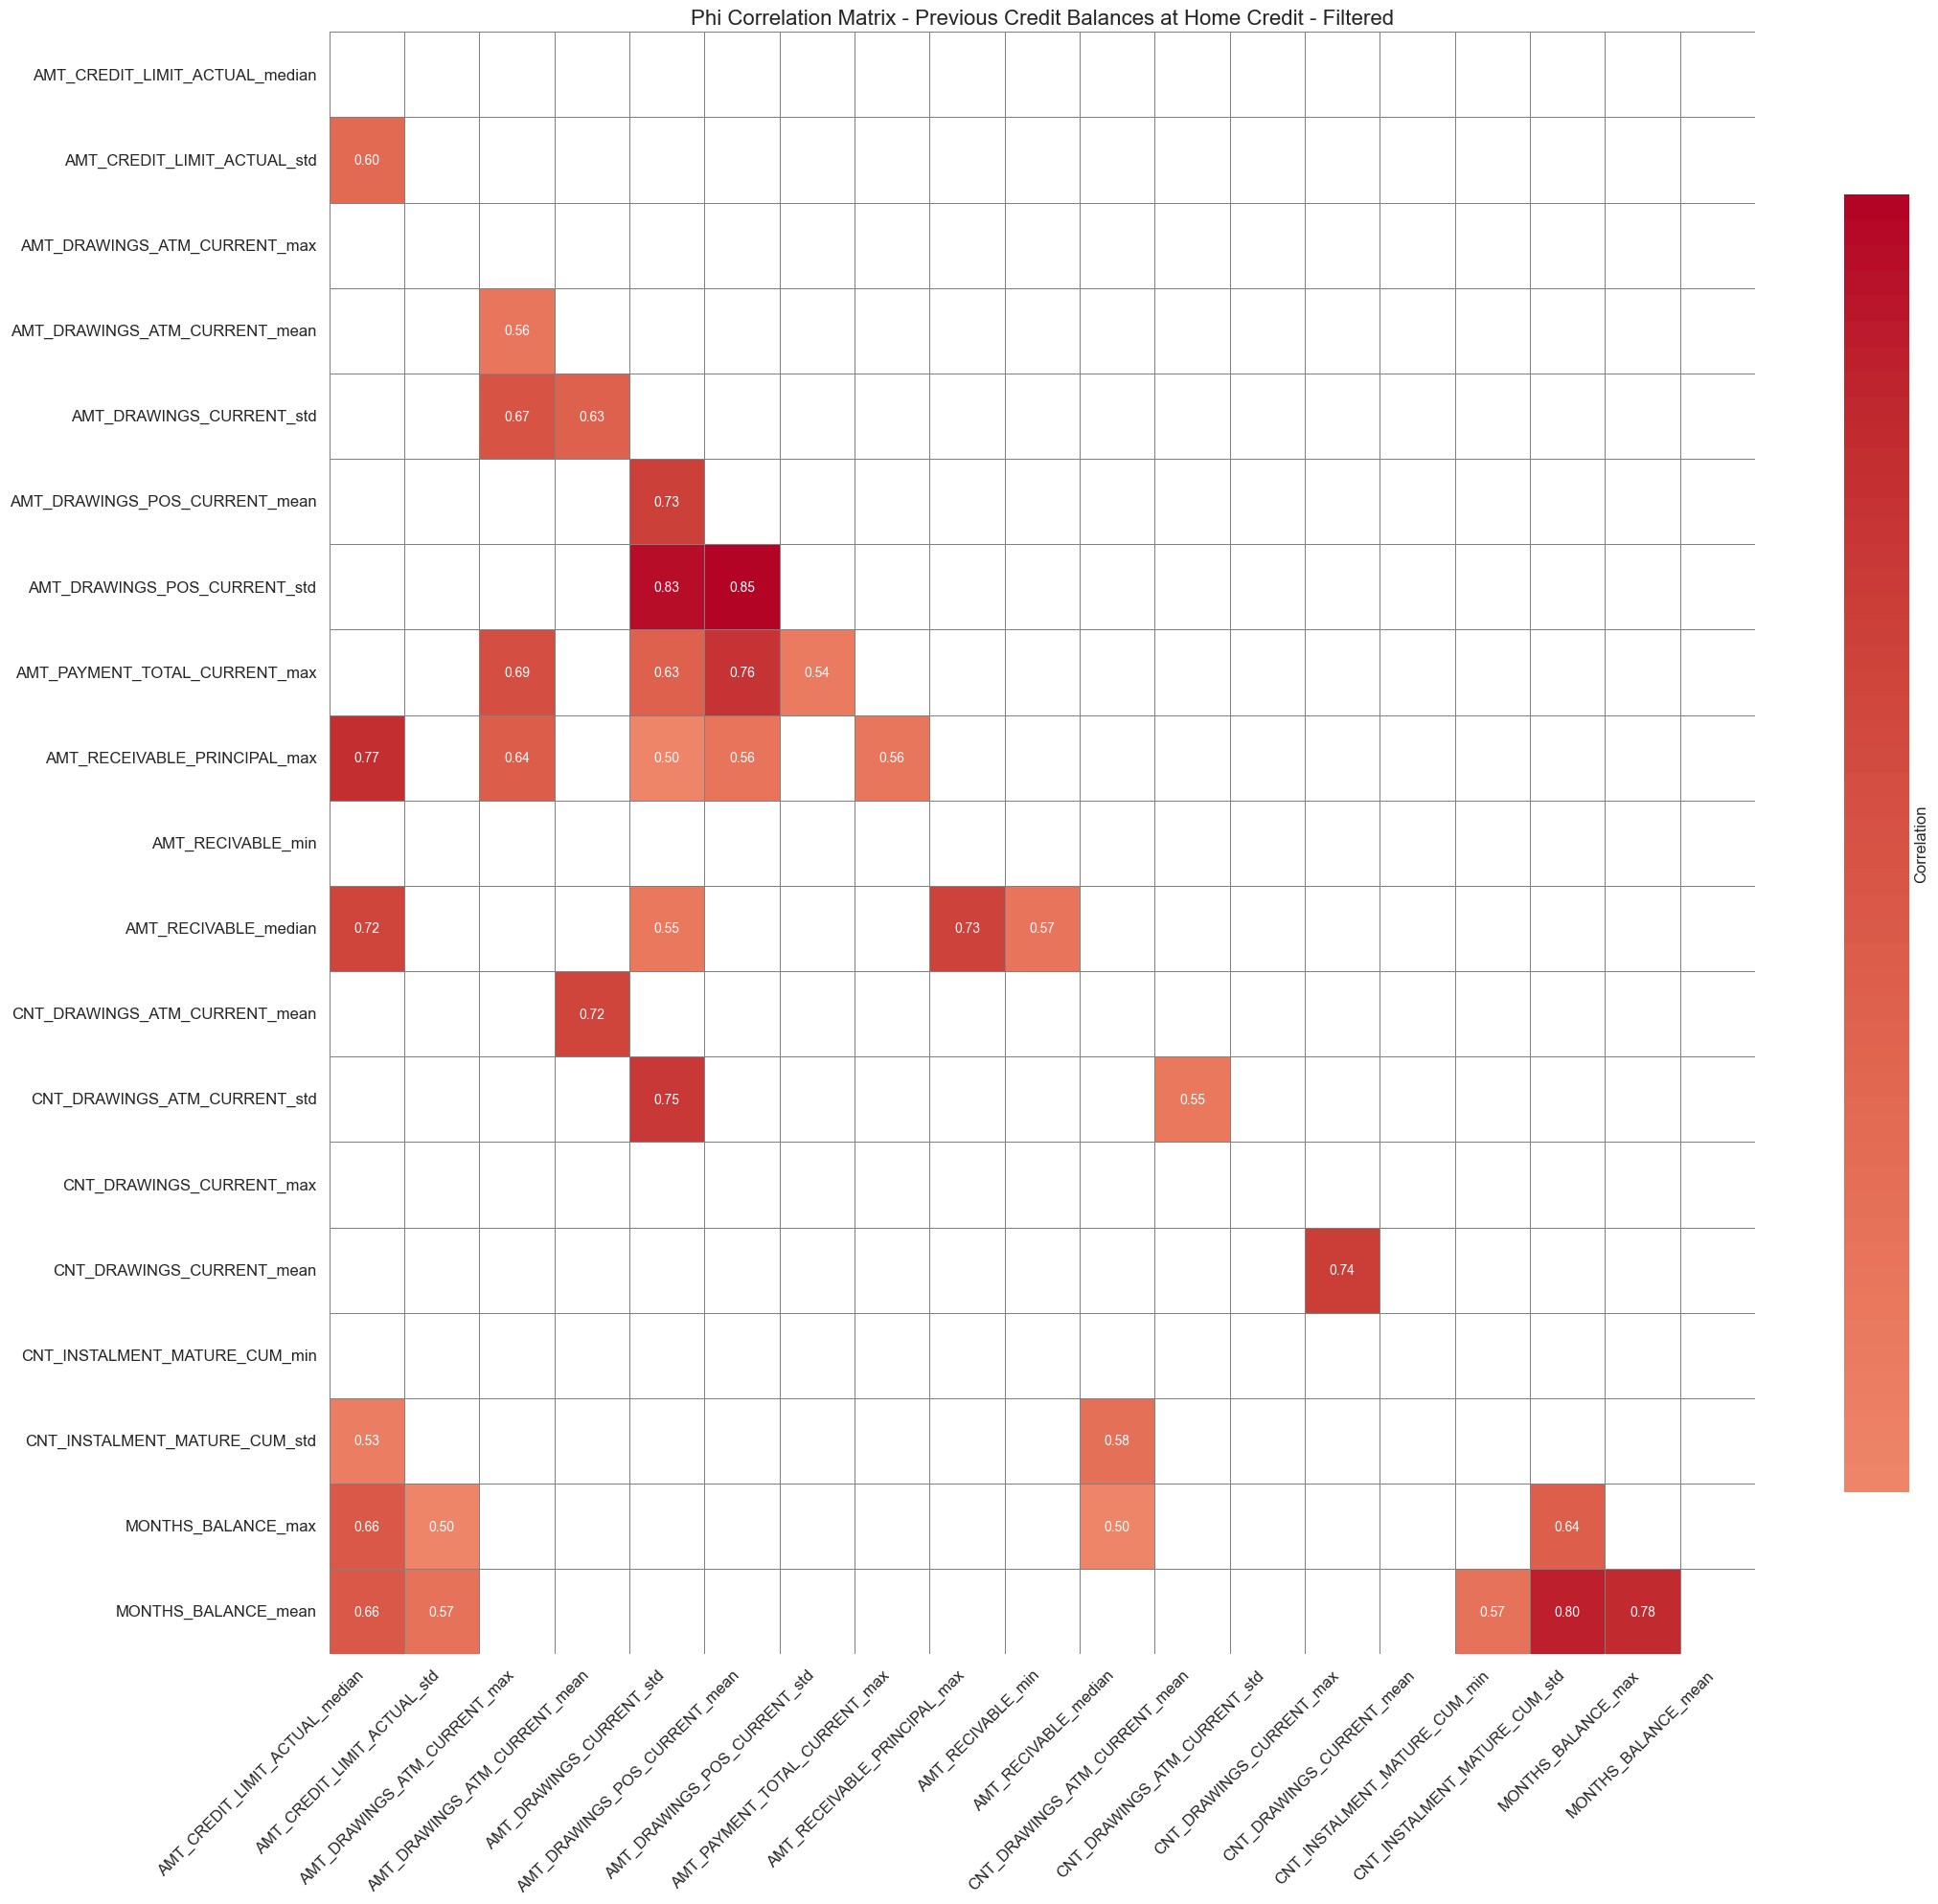

In [27]:
old_credit_balance_phik = pd.concat(
    [old_credit_balance_boruta, y_train], axis=1
).phik_matrix(verbose=False)
ax0 = plot_correlation_matrix(
    old_credit_balance_phik,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Previous Credit Balances at Home Credit - Pre-Filtering",
)
old_credit_balance_phik_mat = correlation_threshold(
    old_credit_balance_phik, threshold=0.85
)
old_credit_balance_filtered = drop_least_target_correlated_features(
    old_credit_balance_phik_mat.copy(),
    old_credit_balance_phik["TARGET"].copy(),
    old_credit_balance_boruta.copy(),
)
old_credit_balance_phik_filtered = old_credit_balance_filtered.phik_matrix(
    verbose=False
)
ax1 = plot_correlation_matrix(
    old_credit_balance_phik_filtered,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Previous Credit Balances at Home Credit - Filtered",
)

In [28]:
old_credit_balance_col_filter = list(
    ["SK_ID_CURR"]
    + ["n_old_credit_balances"]
    + list(old_credit_balance_filtered.columns)
)
old_credit_balance = old_credit_balance_df[old_credit_balance_col_filter]
old_credit_balance

SK_ID_CURR  n_old_credit_balances  AMT_CREDIT_LIMIT_ACTUAL_median  \
0           100006                      6                    270000.00000   
1           100011                     74                    180000.00000   
2           100013                     96                    157500.00000   
3           100021                     17                    675000.00000   
4           100023                      8                    135000.00000   
...            ...                    ...                             ...   
103553      456244                     41                    450000.00000   
103554      456246                      8                    135000.00000   
103555      456247                     95                    180000.00000   
103556      456248                     23                    900000.00000   
103557      456250                     12                    180000.00000   

        AMT_CREDIT_LIMIT_ACTUAL_std  AMT_DRAWINGS_ATM_CURRENT_max  \
0                           0.00000                       0.00000   
1                       34482.74362                  180000.00000   
2                       47531.58576                  157500.00000   
3                           0.00000                       0.00000   
4                       96214.04709                       0.00000   
...                             ...                           ...   
103553                 216041.15462                  279000.00000   
103554                      0.00000                       0.00000   
103555                  72381.96555                   96750.00000   
103556                      0.00000                       0.00000   
103557                   2035.20158                  171000.00000   

        AMT_DRAWINGS_ATM_CURRENT_mean  AMT_DRAWINGS_CURRENT_std  \
0                             0.00000                   0.00000   
1                          2432.43237               20924.57497   
2                          6350.00000               27843.36623   
3                             0.00000                   0.00000   
4                             0.00000                   0.00000   
...                               ...                       ...   
103553                    24475.60938               58950.15947   
103554                        0.00000               21710.63682   
103555                     2136.31567               13507.27223   
103556                        0.00000                   0.00000   
103557                    15000.00000               49195.34346   

        AMT_DRAWINGS_POS_CURRENT_mean  AMT_DRAWINGS_POS_CURRENT_std  \
0                             0.00000                       0.00000   
1                             0.00000                       0.00000   
2                             0.00000                       0.00000   
3                             0.00000                       0.00000   
4                             0.00000                       0.00000   
...                               ...                           ...   
103553                     2363.01587                    7177.45762   
103554                    15199.25684                   21710.63682   
103555                       13.19068                     128.56689   
103556                        0.00000                       0.00000   
103557                        0.00000                       0.00000   

        AMT_PAYMENT_TOTAL_CURRENT_max  ...  AMT_RECIVABLE_min  \
0                             0.00000  ...            0.00000   
1                         55485.00000  ...         -563.35498   
2                        153675.00000  ...         -274.32001   
3                             0.00000  ...            0.00000   
4                             0.00000  ...            0.00000   
...                               ...  ...                ...   
103553                   482329.62500  ...            0.00000   
103554                    41419.71094  ...            0.00000   
103555     

__Credit Bureau Data__

In [29]:
bureau_feat_sel = pd.merge(
    X_train["SK_ID_CURR"], bureau_df, on="SK_ID_CURR", how="left"
)
bureau_feat_sel = bureau_feat_sel.fillna(0)
bureau_boruta, _ = boruta_feature_selection(bureau_feat_sel, y_train.values.ravel())

Iteration: 	1 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	2 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	3 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	4 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	5 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	6 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	7 / 40
Confirmed: 	0
Tentative: 	155
Rejected: 	0
Iteration: 	8 / 40
Confirmed: 	68
Tentative: 	33
Rejected: 	54
Iteration: 	9 / 40
Confirmed: 	68
Tentative: 	33
Rejected: 	54
Iteration: 	10 / 40
Confirmed: 	68
Tentative: 	33
Rejected: 	54
Iteration: 	11 / 40
Confirmed: 	68
Tentative: 	33
Rejected: 	54
Iteration: 	12 / 40
Confirmed: 	70
Tentative: 	31
Rejected: 	54
Iteration: 	13 / 40
Confirmed: 	70
Tentative: 	26
Rejected: 	59
Iteration: 	14 / 40
Confirmed: 	70
Tentative: 	26
Rejected: 	59
Iteration: 	15 / 40
Confirmed: 	70
Tentative: 	26
Rejected: 	59
Iteration: 	16 / 40
Confirmed: 	72
Tentative: 	24
Reject

In [30]:
bureau_boruta.to_pickle("../data/aggregated_supplementary_data/bureau_boruta.pkl")

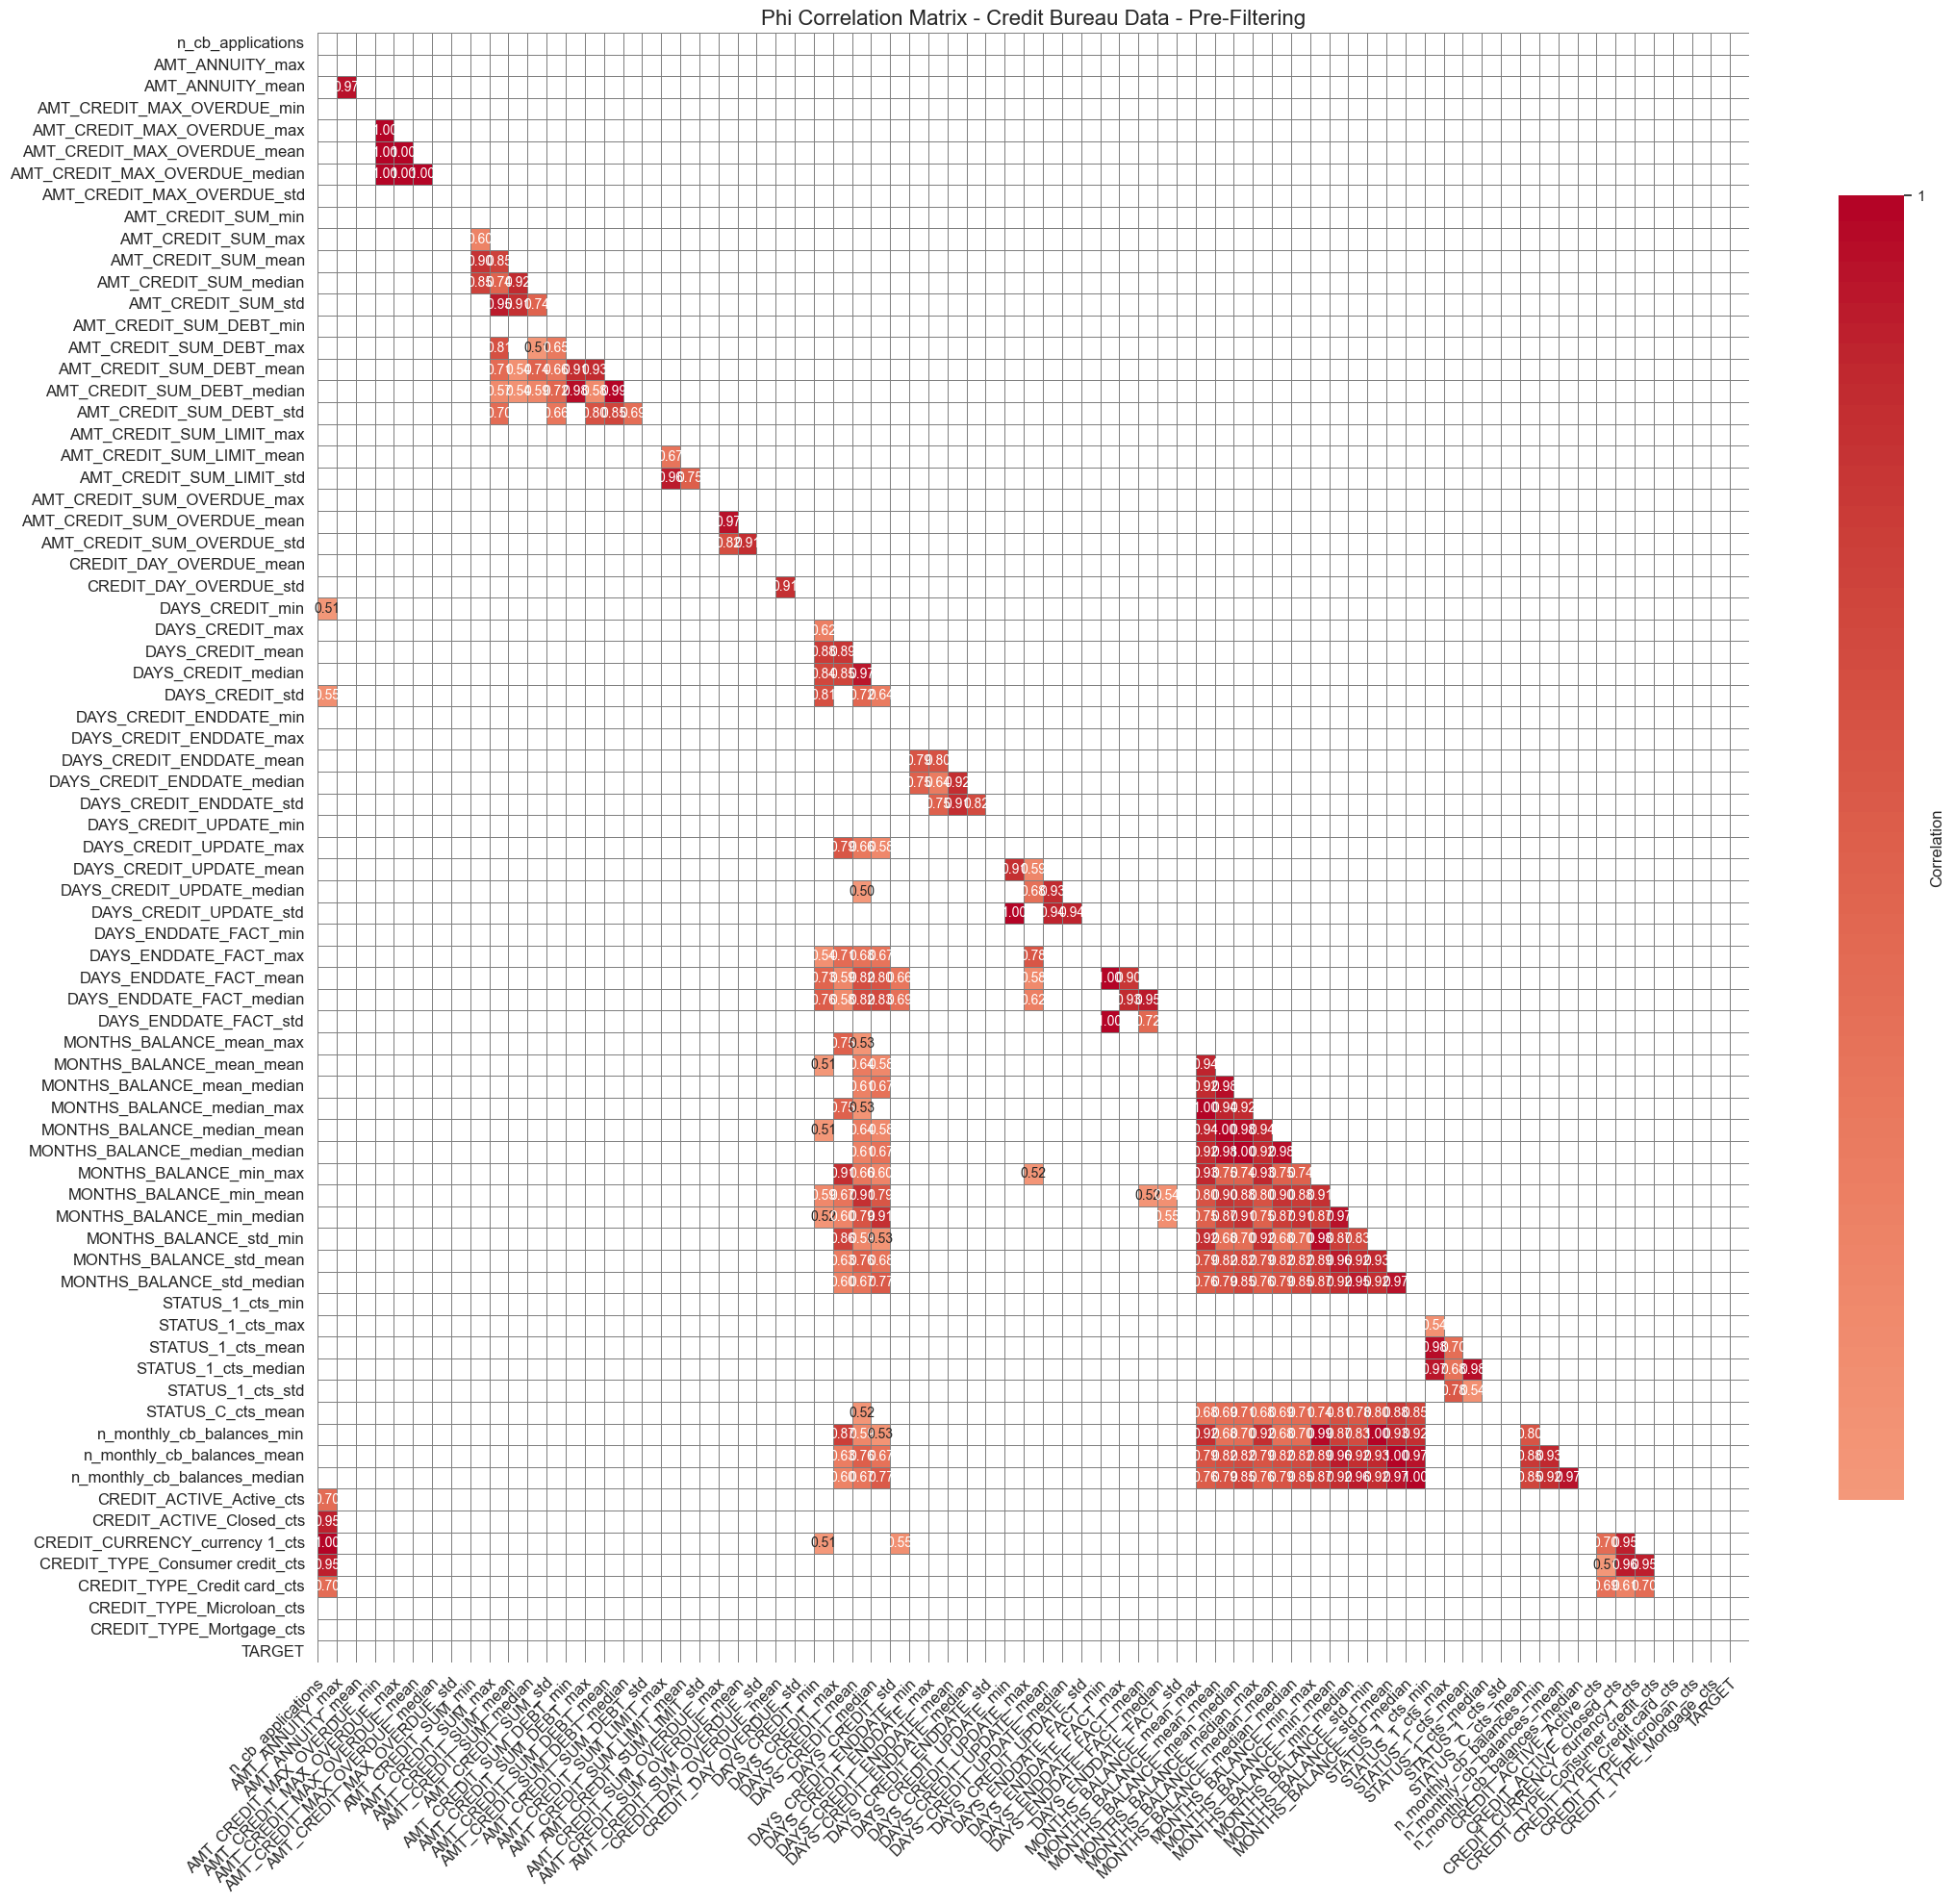

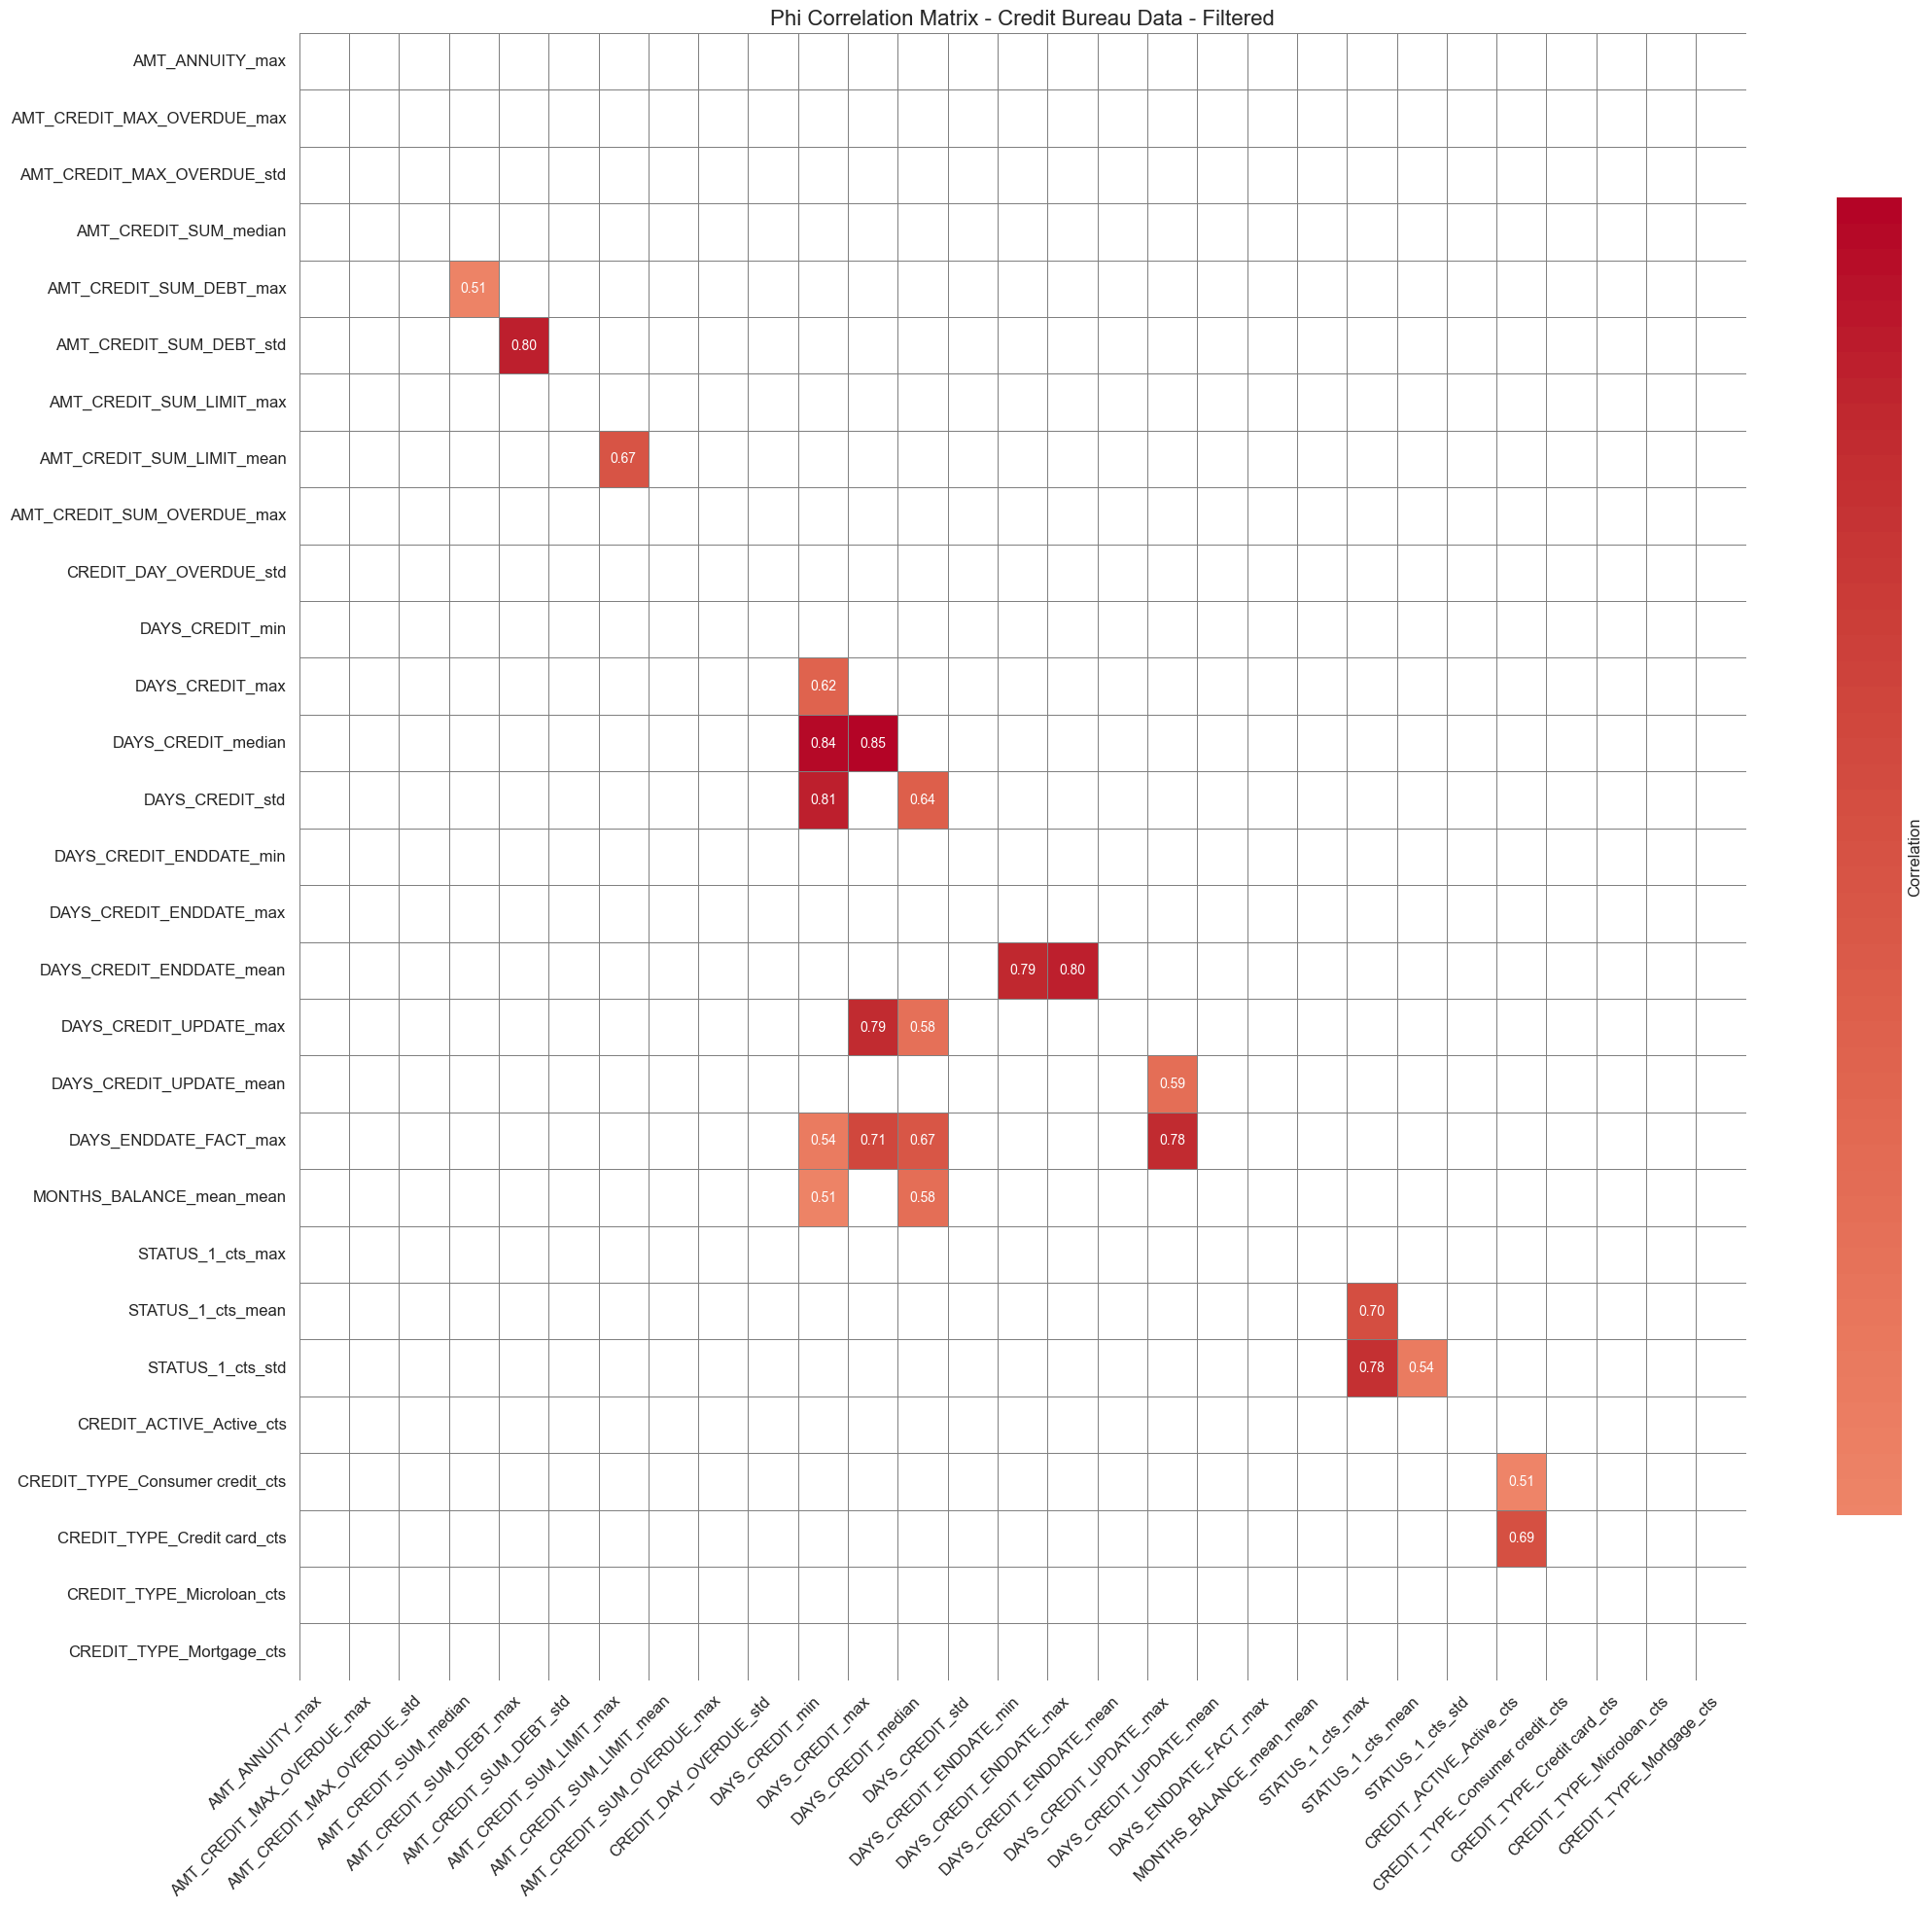

In [31]:
bureau_phik = pd.concat([bureau_boruta, y_train], axis=1).phik_matrix(verbose=False)
ax0 = plot_correlation_matrix(
    bureau_phik,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Credit Bureau Data - Pre-Filtering",
)
bureau_phik_mat = correlation_threshold(bureau_phik, threshold=0.85)
bureau_filtered = drop_least_target_correlated_features(
    bureau_phik_mat.copy(), bureau_phik["TARGET"].copy(), bureau_boruta.copy()
)
bureau_phik_filtered = bureau_filtered.phik_matrix(verbose=False)
ax1 = plot_correlation_matrix(
    bureau_phik_filtered,
    figsize=(24, 22),
    threshold=0.5,
    title="Phi Correlation Matrix - Credit Bureau Data - Filtered",
)

In [32]:
bureau_filter = list(
    ["SK_ID_CURR"] + ["n_cb_applications"] + list(bureau_filtered.columns)
)
bureau = bureau_df[bureau_filter]
bureau

SK_ID_CURR  n_cb_applications  AMT_ANNUITY_max  \
0           100001                  7      10822.50000   
1           100002                  8          0.00000   
2           100003                  4          0.00000   
3           100004                  2          0.00000   
4           100005                  3       4261.50000   
...            ...                ...              ...   
305806      456249                 13          0.00000   
305807      456250                  3     384147.00000   
305808      456253                  4      58369.50000   
305809      456254                  1          0.00000   
305810      456255                 11       3244.50000   

        AMT_CREDIT_MAX_OVERDUE_max  AMT_CREDIT_MAX_OVERDUE_std  \
0                          0.00000                     0.00000   
1                       5043.64502                  2363.24691   
2                          0.00000                     0.00000   
3                          0.00000                     0.00000   
4                          0.00000                     0.00000   
...                            ...                         ...   
305806                 18945.00000                  8789.04261   
305807                     0.00000                     0.00000   
305808                     0.00000                     0.00000   
305809                     0.00000                     0.00000   
305810                 25578.00000                 10594.89193   

        AMT_CREDIT_SUM_median  AMT_CREDIT_SUM_DEBT_max  \
0                168345.00000             373239.00000   
1                 54130.50000             245781.00000   
2                 92576.25000                  0.00000   
3                 94518.89844                  0.00000   
4                 58500.00000             543087.00000   
...                       ...                      ...   
305806           248692.50000             163071.00000   
305807           483349.50000            1840308.50000   
305808           675000.00000            1624797.00000   
305809            45000.00000                  0.00000   
305810           436032.00000             595102.50000   

        AMT_CREDIT_SUM_DEBT_std  AMT_CREDIT_SUM_LIMIT_max  \
0                  137485.63112                   0.00000   
1                  109916.60472               31988.56445   
2                       0.00000              810000.00000   
3                       0.00000                   0.00000   
4                  306503.33900                   0.00000   
...                         ...                       ...   
305806              51567.57803                   0.00000   
305807             969412.53723               58268.38672   
305808             788028.03747                   0.00000   
305809                  0.00000                   0.00000   
305810             219459.16295                   0.00000   

        AMT_CREDIT_SUM_LIMIT_mean  ...  DAYS_ENDDATE_FACT_max  \
0                         0.00000  ...             -544.00000   
1                      7997.14111  ...              -36.00000   
2                    202500.00000  ...             -540.00000   
3                         0.00000  ...             -382.00000   
4                         0.00000  ...             -123.00000   
...                           ...  ...                    ...   
305806                    0.00000  ...             -291.00000   
305807                19422.79492  ...             -760.00000   
305808                    0.00000  ...             -794.00000   
305809                    0.00000  ...             -859.00000   
305810                    0.00000  ...             -712.00000   

        MONTHS_BALANCE_mean_mean  STATUS_1_cts_max  STATUS_1_cts_mean  \
0                      -11.78571           1.00000            0.14286   
1                      -21.87500           6.00000            3.37500   
2                        0.00000           0.00000            0.00000   
3              

# Combine All Supplementary Datasets

In [33]:
temp1 = pd.merge(left=old_apps, right=past_payment, how="outer", on="SK_ID_CURR")
temp2 = pd.merge(left=old_cash_balance, right=temp1, how="outer", on="SK_ID_CURR")
temp3 = pd.merge(left=old_credit_balance, right=temp2, how="outer", on="SK_ID_CURR")
supplementary_data = pd.merge(left=bureau, right=temp3, how="outer", on="SK_ID_CURR")
supplementary_data

SK_ID_CURR  n_cb_applications  AMT_ANNUITY_max_x  \
0           100001            7.00000        10822.50000   
1           100002            8.00000            0.00000   
2           100003            4.00000            0.00000   
3           100004            2.00000            0.00000   
4           100005            3.00000         4261.50000   
...            ...                ...                ...   
353890      456251                NaN                NaN   
353891      456252                NaN                NaN   
353892      456253            4.00000        58369.50000   
353893      456254            1.00000            0.00000   
353894      456255           11.00000         3244.50000   

        AMT_CREDIT_MAX_OVERDUE_max  AMT_CREDIT_MAX_OVERDUE_std  \
0                          0.00000                     0.00000   
1                       5043.64502                  2363.24691   
2                          0.00000                     0.00000   
3                          0.00000                     0.00000   
4                          0.00000                     0.00000   
...                            ...                         ...   
353890                         NaN                         NaN   
353891                         NaN                         NaN   
353892                     0.00000                     0.00000   
353893                     0.00000                     0.00000   
353894                 25578.00000                 10594.89193   

        AMT_CREDIT_SUM_median  AMT_CREDIT_SUM_DEBT_max  \
0                168345.00000             373239.00000   
1                 54130.50000             245781.00000   
2                 92576.25000                  0.00000   
3                 94518.89844                  0.00000   
4                 58500.00000             543087.00000   
...                       ...                      ...   
353890                    NaN                      NaN   
353891                    NaN                      NaN   
353892           675000.00000            1624797.00000   
353893            45000.00000                  0.00000   
353894           436032.00000             595102.50000   

        AMT_CREDIT_SUM_DEBT_std  AMT_CREDIT_SUM_LIMIT_max  \
0                  137485.63112                   0.00000   
1                  109916.60472               31988.56445   
2                       0.00000              810000.00000   
3                       0.00000                   0.00000   
4                  306503.33900                   0.00000   
...                         ...                       ...   
353890                      NaN                       NaN   
353891                      NaN                       NaN   
353892             788028.03747                   0.00000   
353893                  0.00000                   0.00000   
353894             219459.16295                   0.00000   

        AMT_CREDIT_SUM_LIMIT_mean  ...  AMT_PAYMENT_min  AMT_PAYMENT_max  \
0                         0.00000  ...       3951.00000      17397.90039   
1                      7997.14111  ...       9251.77539      53093.74609   
2                    202500.00000  ...       6662.97021     560835.37500   
3                         0.00000  ...       5357.25000      10573.96484   
4                         0.00000  ...       4813.20020      17656.24414   
...                           ...  ...              ...              ...   
353890                        NaN  ...       6605.91016      12815.00977   
353891                        NaN  ...      10046.87988      10074.46484   
353892                    0.00000  ...         27.27000       5575.18506   
353893                    0.00000  ...       2296.43994      19065.82422   
353894                    0.00000  ...         34.96500     669251.62500   

        AMT_PAYMENT_std  DAYS_ENTRY_PAYMENT_min  DAYS_ENTRY_PAYMENT_std  \
0            5076.67676             -2916.00000               644.08033   
1

In [34]:
supplementary_data.to_pickle(
    "../data/aggregated_supplementary_data/supplementary_data.pkl"
)

# Notebook Summary

- There are an immense number of features that can be created from the supplementary datasets
- Not all people who are applying for a loan are represented in these data
- We can aggregate these data in order to make them more reasonable
- We can also include counts of how many aggregations we perform in order to get a number of counts for each number of previous applications, number of monthly payments, and other features in order to use these data across applicants whether they applied for loans previously or not. 
- To reduce the immense number of features, we have correlated features to one another and dropped whichever in the pair of highly correlated features is less correlated to the target in order to reduce the amount of redundancy while also reducing the amount of features. 